In [207]:
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 회귀분석
from statsmodels.formula.api import ols

# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant

# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 선형회귀모형
from sklearn.linear_model import LinearRegression

# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE

# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

# 평가함수
from statsmodels.tools.eval_measures import rmse

from scipy.stats import shapiro

In [208]:
#matplotlib.rc('axes', unicode_minus = False)
matplotlib.rc('font', family = 'Malgun Gothic')

In [209]:
# 데이터 불러오기
df = pd.read_csv("new_card_spending.csv", parse_dates = ["사용일자"])
df.head()

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,연령대,요일
0,2018-04-01,노원구,상계2동,노원구 상계2동,자동차정비,여성,42,3,56,82,40대,일
1,2018-04-01,종로구,혜화동,종로구 혜화동,유통업,여성,43,2,50,61,40대,일
2,2018-04-01,노원구,"상계6,7동","노원구 상계6,7동",레저업소,남성,50,2,59,140,50대,일
3,2018-04-01,종로구,"종로5,6가동","종로구 종로5,6가동",레저업소,남성,45,3,56,104,40대,일
4,2018-04-01,노원구,중계4동,노원구 중계4동,음료식품,여성,38,2,57,103,30대,일


In [211]:
df.shape

(187322, 12)

# EDA

bar, pie, histogram, trend chart, boxplot, scatter matrix, heat map, 상관관계분석

## To find target, Explore insight

#### 연령대별 사용금액

<AxesSubplot:xlabel='연령대', ylabel='사용금액'>

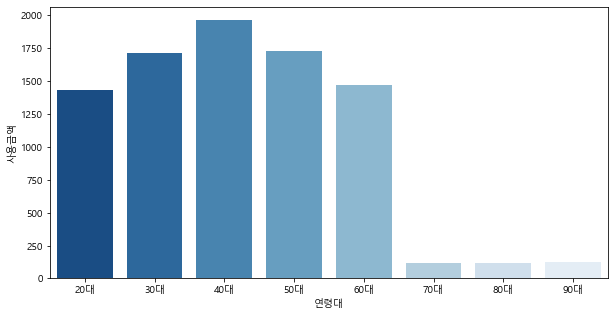

In [215]:
age_group_money = df.pivot_table(index= "연령대", values="사용금액").sort_values(by="연령대", ascending=True)

plt.figure(figsize = (10,5))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용금액", palette = "Blues_r")

In [220]:
age_group_money

,사용금액
연령대,
20대,1428.150299
30대,1711.009358
40대,1965.491178
50대,1730.373425
60대,1469.113313
70대,116.834767
80대,119.930680
90대,124.787129


In [219]:
df['연령대'].value_counts().sort_values(ascending = False)

40대    39845
50대    37057
30대    36760
20대    32229
60대    29467
70대     6857
80대     3895
90대     1212
Name: 연령대, dtype: int64

> 연령대별 사용금액과 빈도를 확인해보니 20-60대의 소비가 대체적으로 주임을 알 수 있음

#### 소비처업종별 사용금액

<AxesSubplot:xlabel='소비처업종', ylabel='사용금액'>

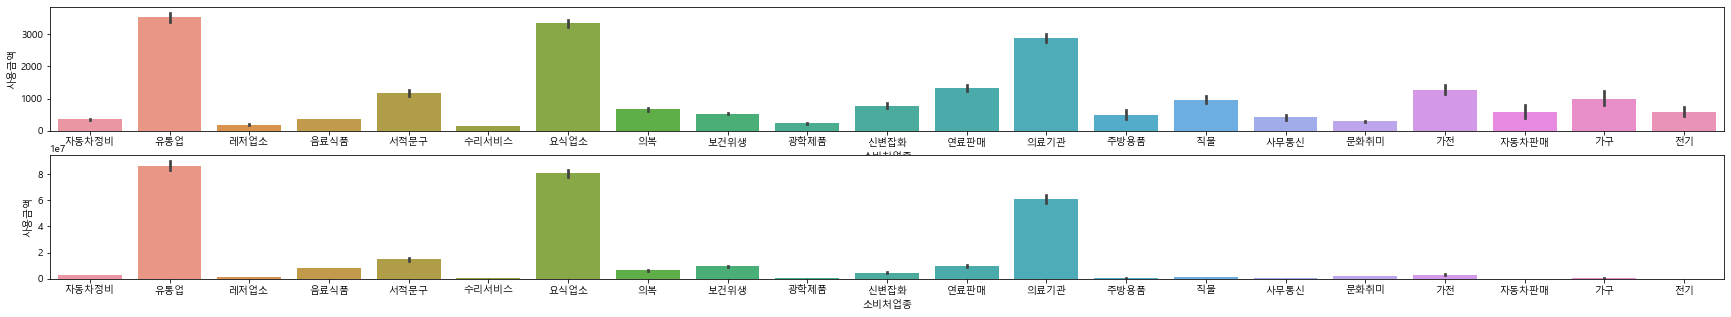

In [108]:
figure, ((ax1),(ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(30,5)

sns.barplot(data = df, x = "소비처업종", y = "사용금액", ax=ax1) #mean
sns.barplot(data = df, x = "소비처업종", y = "사용금액", estimator = sum, ax=ax2) #sum

#### 연령별 소비업종 빈도

<ipython-input-174-ccb7f7ea33a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['연령대'] = '청년'
<ipython-input-174-ccb7f7ea33a8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['연령대'] = '중장년'


<AxesSubplot:xlabel='소비처업종', ylabel='사용금액'>

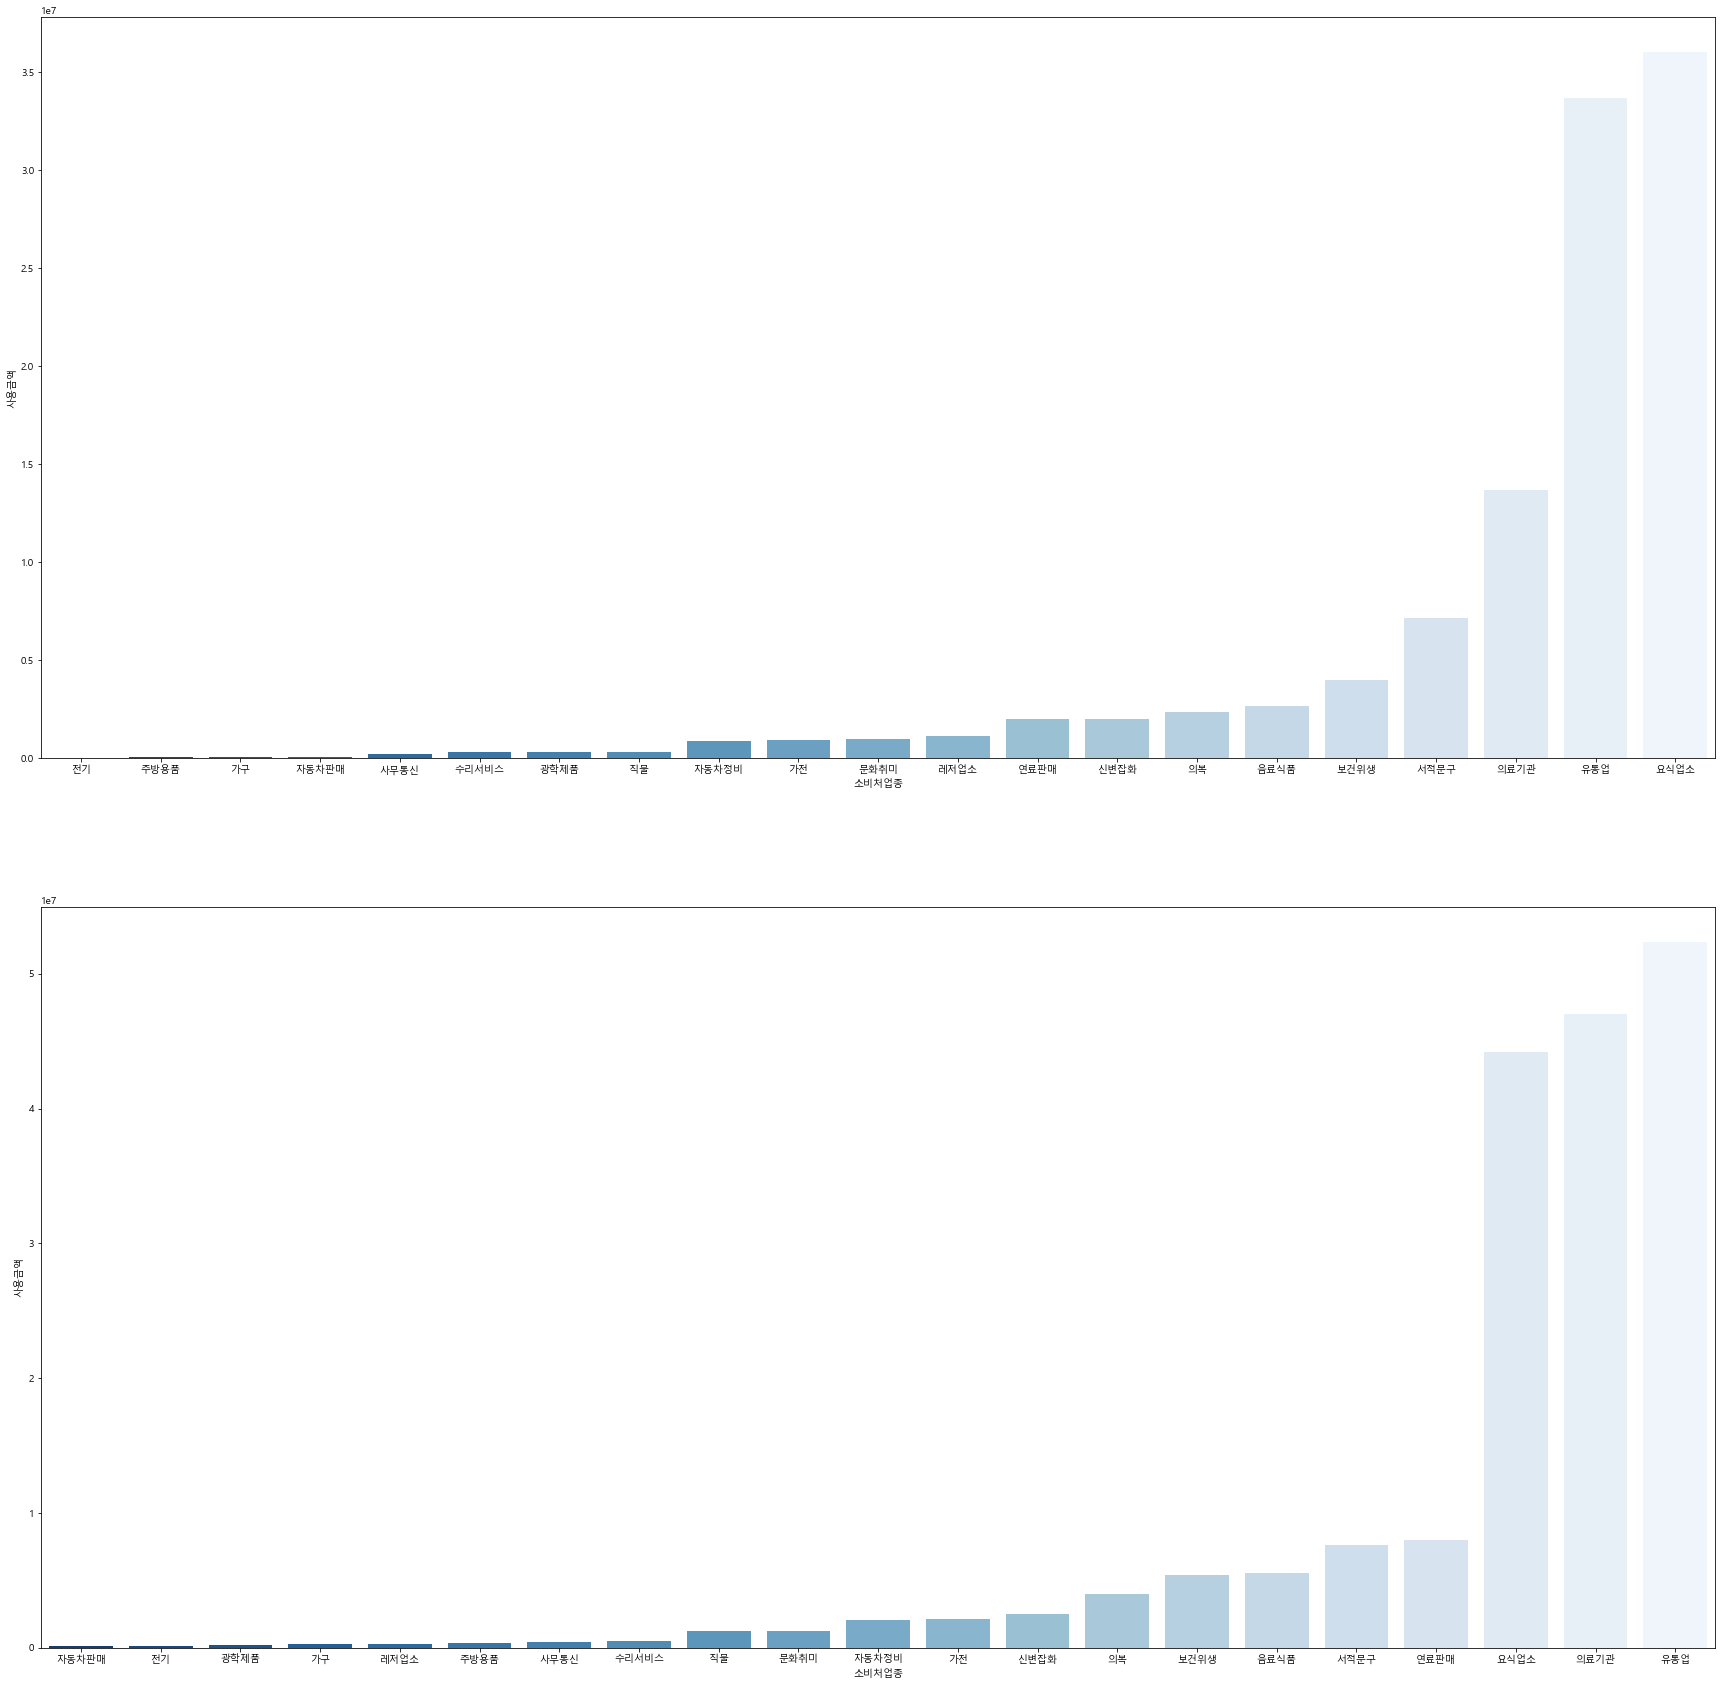

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [174]:
figure, ((ax1),(ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(30,30)

df_1 = df_merge[(df_merge['연령대'] == '20대')| (df_merge['연령대'] == '30대')]
df_1['연령대'] = '청년'

df_2 = df_merge[(df_merge['연령대'] == '40대')| (df_merge['연령대'] == '50대')| (df_merge['연령대'] == '60대')]
df_2['연령대'] = '중장년'

age_group_money = df_1.pivot_table(index= "소비처업종", values="사용금액",aggfunc='sum').sort_values(by="사용금액", ascending=True)
plt.figure(figsize = (20,10))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용금액", ax = ax1, palette = "Blues_r",estimator= sum)

age_group_money = df_2.pivot_table(index= "소비처업종", values="사용금액",aggfunc='sum').sort_values(by="사용금액", ascending=True)
plt.figure(figsize = (20,10))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용금액", ax = ax2, palette = "Blues_r",estimator= sum)

> 2-30대와 4-60대로 나누어 사용금액에 따른 주 소비처업종을 살펴본 결과이다.

- 연령대별 사용금액(평균)에 따른 소비처 업종

<AxesSubplot:xlabel='소비처업종', ylabel='사용금액'>

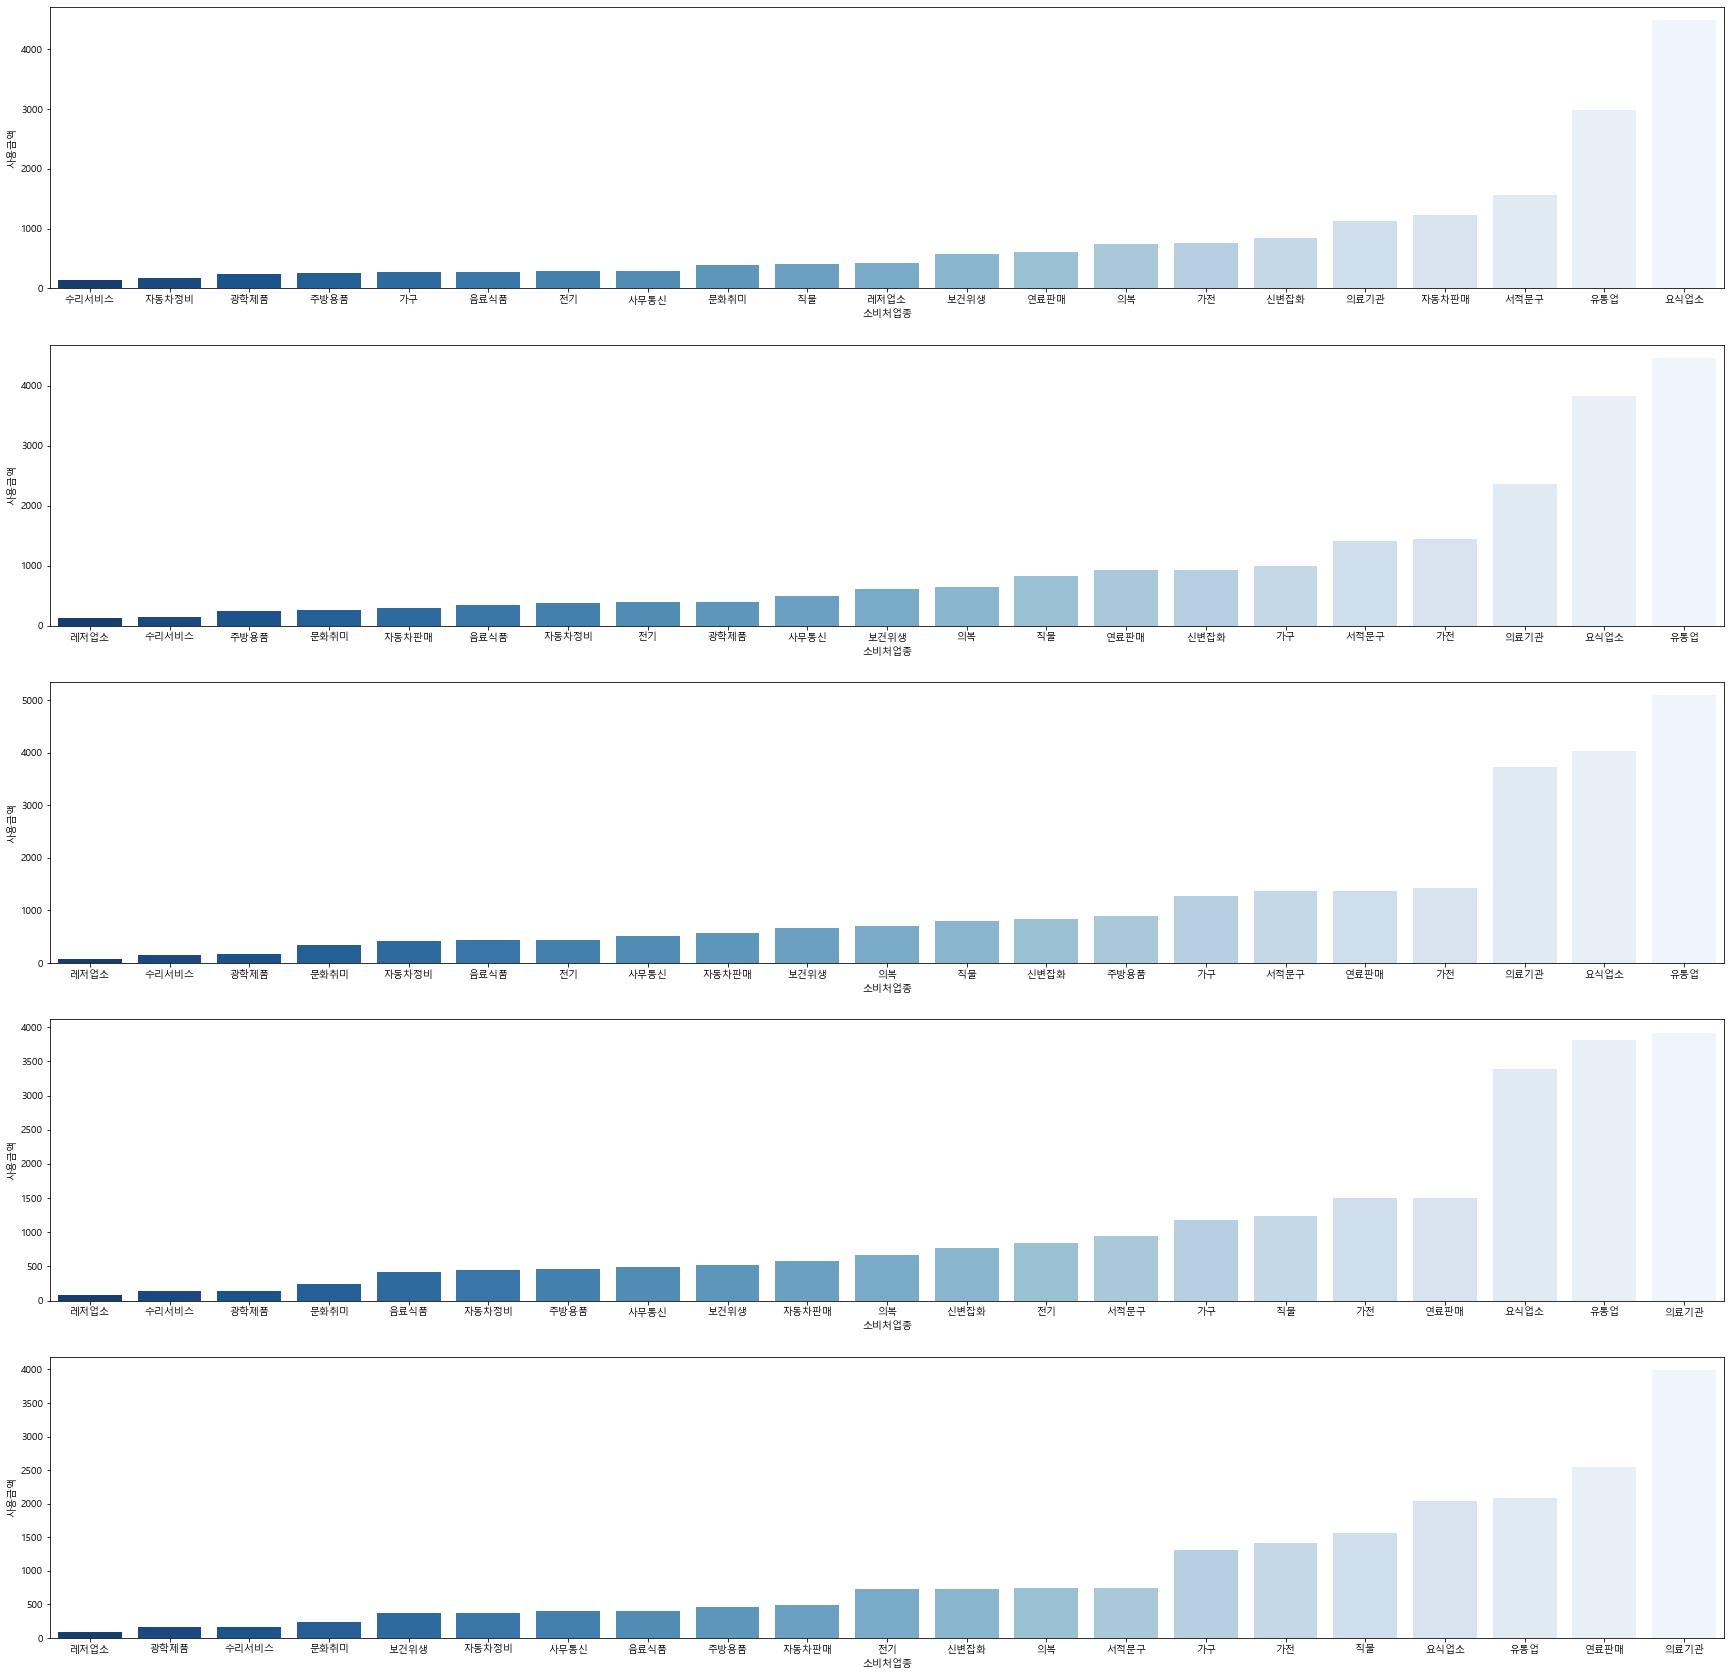

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

In [209]:
df_1 = df[df['연령대'] == '20대']
df_2 = df[df['연령대'] == '30대']
df_3 = df[df['연령대'] == '40대']
df_4 = df[df['연령대'] == '50대']
df_5 = df[df['연령대'] == '60대']

figure, ((ax1),(ax2),(ax3),(ax4),(ax5)) = plt.subplots(nrows=5, ncols=1)
figure.set_size_inches(30,30)

age_group_money = df_1.pivot_table(index= "소비처업종", values="사용금액").sort_values(by="사용금액", ascending=True)
plt.figure(figsize = (12,4))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용금액", ax= ax1, palette = "Blues_r")

age_group_money = df_2.pivot_table(index= "소비처업종", values="사용금액").sort_values(by="사용금액", ascending=True)
plt.figure(figsize = (12,4))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용금액", ax= ax2, palette = "Blues_r")

age_group_money = df_3.pivot_table(index= "소비처업종", values="사용금액").sort_values(by="사용금액", ascending=True)
plt.figure(figsize = (12,4))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용금액", ax= ax3, palette = "Blues_r")

age_group_money = df_4.pivot_table(index= "소비처업종", values="사용금액").sort_values(by="사용금액", ascending=True)
plt.figure(figsize = (12,4))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용금액", ax= ax4, palette = "Blues_r")

age_group_money = df_5.pivot_table(index= "소비처업종", values="사용금액").sort_values(by="사용금액", ascending=True)
plt.figure(figsize = (12,4))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용금액", ax= ax5, palette = "Blues_r")

> 위에서 청년, 중장년으로 나눈 것과 달리 연령대에 따라 소비처업종을 파악해보았다.  
  20대 : 요식업소, 유통업 / 30대 : 유통,요식,의료 / 40대 : 유통, 요식, 의료 / 50대 : 의료, 유통, 요식 / 60대 : 의료, 연료, 유통

- 연령대별 사용금액(합계)에 따른 소비처 업종

<AxesSubplot:xlabel='소비처업종', ylabel='사용금액'>

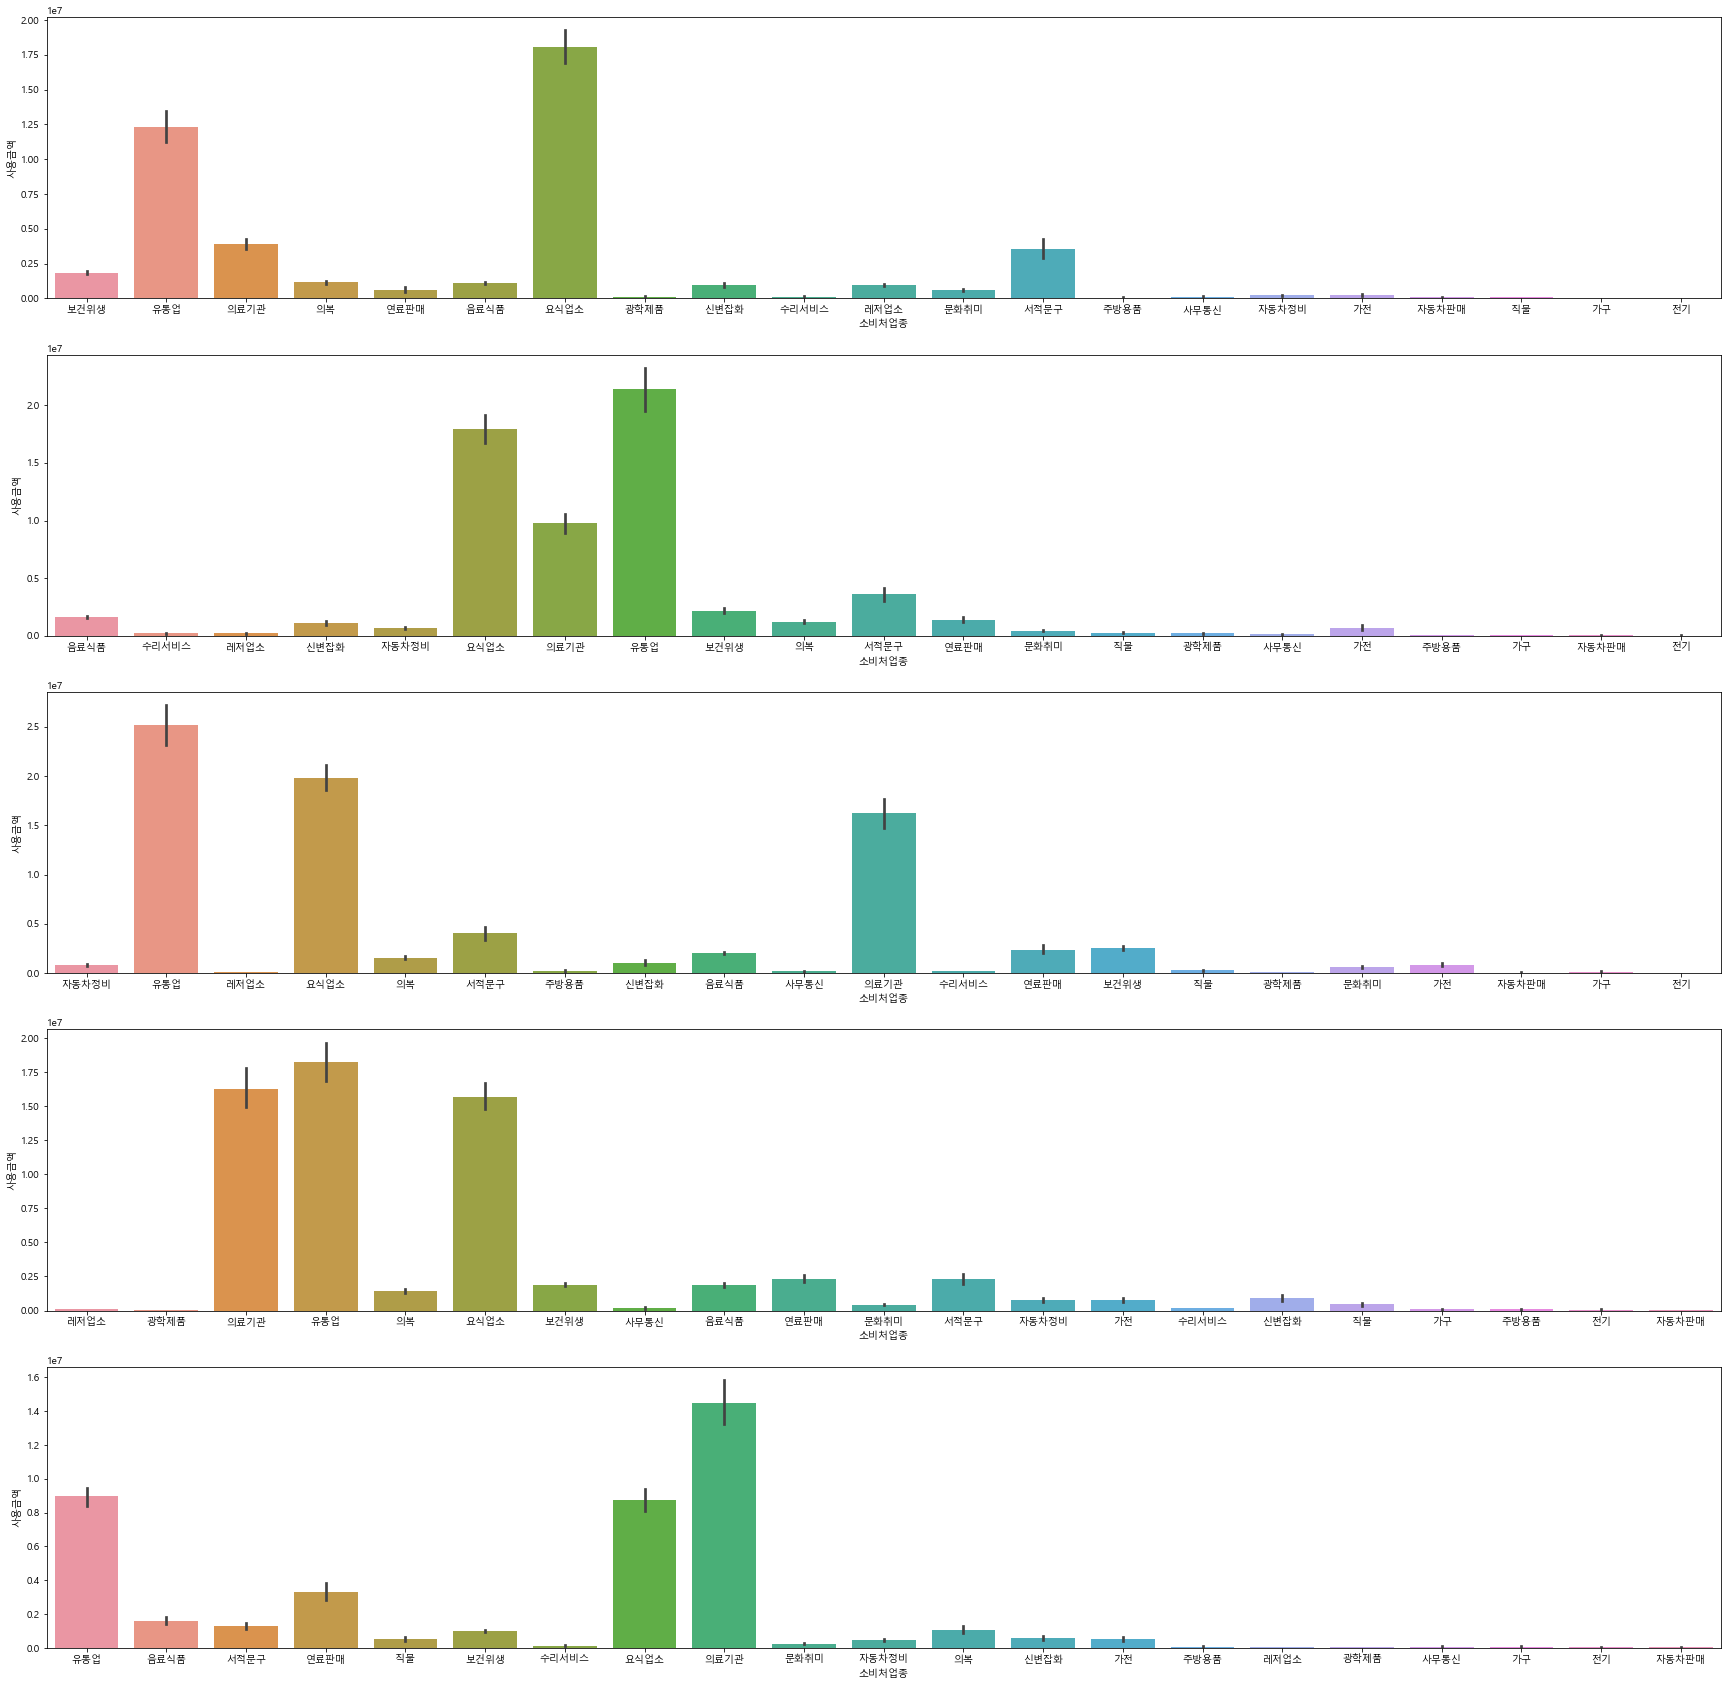

In [189]:
df_1 = df[df['연령대'] == '20대']
df_2 = df[df['연령대'] == '30대']
df_3 = df[df['연령대'] == '40대']
df_4 = df[df['연령대'] == '50대']
df_5 = df[df['연령대'] == '60대']

figure, ((ax1),(ax2),(ax3),(ax4),(ax5)) = plt.subplots(nrows=5, ncols=1)
figure.set_size_inches(30,30)

sns.barplot(data = df_1, x = "소비처업종", y = "사용금액", ax=ax1, estimator=sum) # 20대 mean
sns.barplot(data = df_2, x = "소비처업종", y = "사용금액", ax=ax2, estimator=sum) # 30대 
sns.barplot(data = df_3, x = "소비처업종", y = "사용금액", ax=ax3, estimator=sum) # 40대 
sns.barplot(data = df_4, x = "소비처업종", y = "사용금액", ax=ax4, estimator=sum) # 50대 
sns.barplot(data = df_5, x = "소비처업종", y = "사용금액", ax=ax5, estimator=sum) # 60대 

#### 성별에 따른 사용금액

<AxesSubplot:xlabel='성별', ylabel='사용금액'>

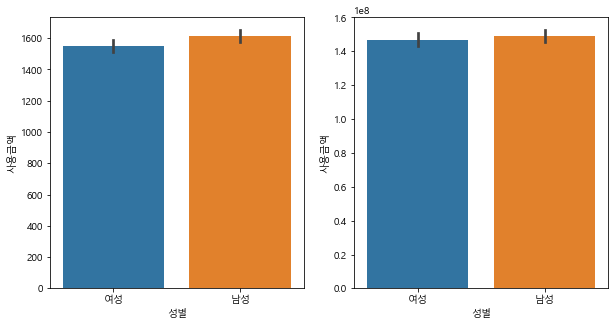

In [12]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(10,5)

sns.barplot(data = df, x = "성별", y = "사용금액", ax=ax1) #mean
sns.barplot(data = df, x = "성별", y = "사용금액", estimator = sum, ax=ax2) #sum

In [13]:
df.groupby(['성별'])['사용금액'].agg('mean')

성별
남성    1612.786335
여성    1549.066186
Name: 사용금액, dtype: float64

In [14]:
df.groupby(['성별'])['사용금액'].agg('sum')

성별
남성    149160157
여성    146911888
Name: 사용금액, dtype: int64

In [15]:
df['성별'].value_counts()

여성    94839
남성    92486
Name: 성별, dtype: int64

<AxesSubplot:ylabel='None'>

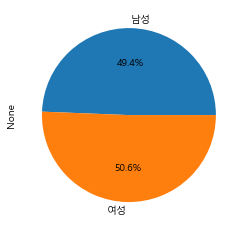

In [44]:
df_count = df.groupby(["성별"]).size()
df_count.plot.pie(y="주소", autopct="%.1f%%")

> 성별에 따른 사용금액을 보면 성별에 따라 금액은 큰 차이를 보이지 않음을 알 수 있다.

#### 연령대별 사용금액

<AxesSubplot:xlabel='연령대', ylabel='사용금액'>

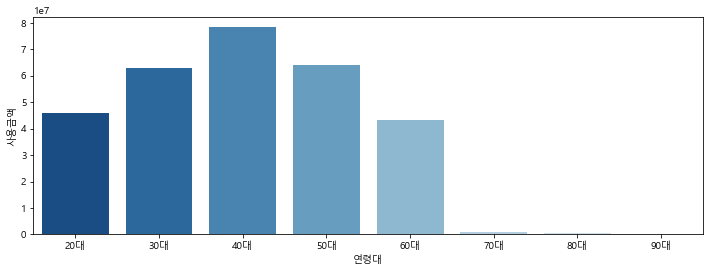

In [29]:
age_group_money = df.pivot_table(index= "연령대", values="사용금액", aggfunc='sum').sort_values(by="연령대", ascending=True)
plt.figure(figsize = (12,4))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용금액",estimator = sum, palette = "Blues_r")

#### 연령대별 사용횟수

<AxesSubplot:xlabel='연령대', ylabel='사용횟수'>

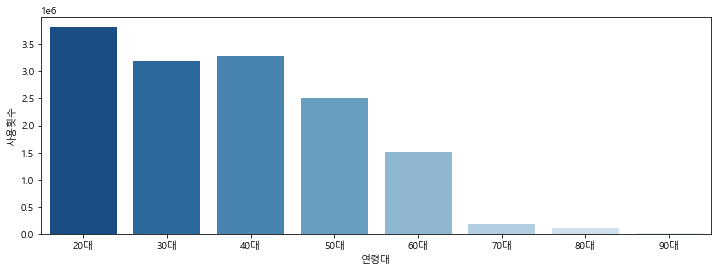

In [59]:
age_group_money = df.pivot_table(index= "연령대", values="사용횟수", aggfunc='sum').sort_values(by="연령대", ascending=True)
plt.figure(figsize = (12,4))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용횟수",estimator = sum, palette = "Blues_r")

<AxesSubplot:xlabel='연령대', ylabel='사용횟수'>

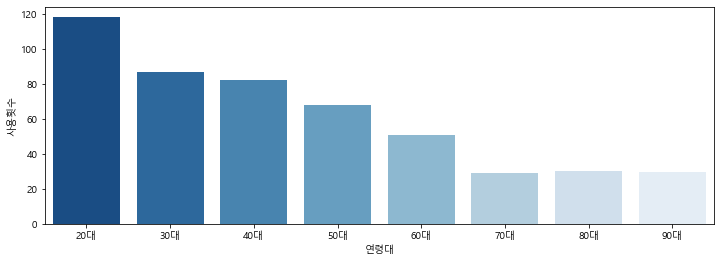

In [60]:
age_group_money = df.pivot_table(index= "연령대", values="사용횟수").sort_values(by="연령대", ascending=True)
plt.figure(figsize = (12,4))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용횟수", palette = "Blues_r")

<AxesSubplot:ylabel='None'>

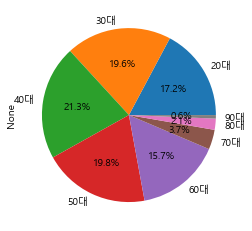

In [48]:
df_count = df.groupby(["연령대"]).size()
df_count.plot.pie(y="주소", autopct="%.1f%%")

> 연령대별 사용금액을 보면 40대의 소비가 가장 크고, 전반적으로는 20-50대의 소비가 큰 것을 알 수 있다.

#### 요일별 사용금액

<AxesSubplot:xlabel='요일', ylabel='사용금액'>

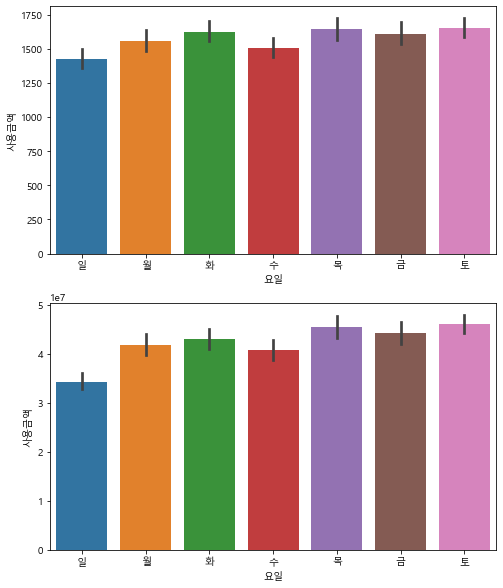

In [53]:
figure, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(8,10)

sns.barplot(data = df, x = "요일", y = "사용금액", ax=ax1) #mean
sns.barplot(data = df, x = "요일", y = "사용금액", estimator = sum, ax=ax2) #sum

<AxesSubplot:ylabel='None'>

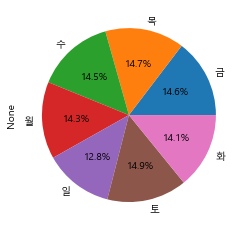

In [49]:
df_count = df.groupby(["요일"]).size()
df_count.plot.pie(y="주소", autopct="%.1f%%")

In [36]:
df.groupby(['요일'])['사용금액'].agg('mean')

요일
금    1611.984029
목    1648.209134
수    1506.450243
월    1562.524623
일    1430.346307
토    1657.440581
화    1627.200060
Name: 사용금액, dtype: float64

In [37]:
df.groupby(['요일'])['사용금액'].agg('sum')

요일
금    44207050
목    45474090
수    40842879
월    41914723
일    34396968
토    46136516
화    43099648
Name: 사용금액, dtype: int64

> 요일별 데이터는 균등하다. Insight X

#### 사용카드별 사용금액

In [25]:
a = df.groupby(['사용카드'])['사용금액'].agg('sum')
a.sort_values(ascending = False)

사용카드
218    12747380
220    11220764
216    11132107
219    11057311
214    10987849
         ...   
65         8172
68         7606
66         7252
70         6521
263         409
Name: 사용금액, Length: 264, dtype: int64

In [26]:
a = df.groupby(['사용카드'])['사용금액'].agg('mean')
a.sort_values(ascending = False)

사용카드
35     6264.192755
37     5934.244819
36     5649.394567
34     5421.463035
221    4639.744789
          ...     
65       89.802198
68       89.482353
67       89.165049
70       86.946667
66       83.356322
Name: 사용금액, Length: 264, dtype: float64

In [30]:
a = df.groupby(['사용카드'])['사용금액'].agg('max')
a.sort_values(ascending = False)

사용카드
215    193694
0      192591
220    181157
13     178656
221    177635
        ...  
85        201
84        196
78        193
68        192
263       123
Name: 사용금액, Length: 264, dtype: int64

In [64]:
p1 = pd.pivot_table(data=df, index='사용카드', values='사용금액', aggfunc='sum').reset_index()

In [49]:
order_list = p1.sort_values(by='사용금액', ascending=False).head(10)['사용카드'].to_list()

<AxesSubplot:xlabel='사용카드', ylabel='사용금액'>

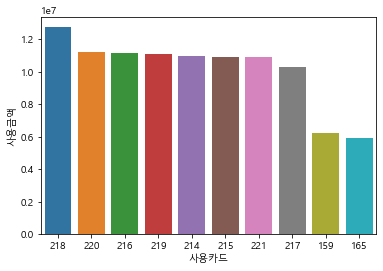

In [50]:
sns.barplot(data=p1, x='사용카드', y='사용금액', order=order_list)

#### 구에 따른 소비처(동) - 사용금액

In [105]:
a1 = pd.pivot_table(data=df, index=['지역','소비처'], values='사용금액', aggfunc=['sum', 'mean']).reset_index()
a11 = a1[a1['지역']=="노원구"]

In [106]:
order_list = a11.sort_values(by='사용금액', ascending=False).head(10)['소비처'].to_list()

KeyError: '사용금액'

<AxesSubplot:xlabel='소비처', ylabel='사용금액'>

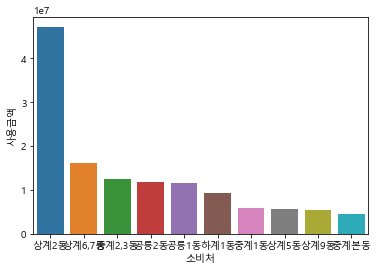

In [97]:
sns.barplot(data=a11, x='소비처', y='사용금액', order=order_list)
sns.barplot(data=a11, x='소비처', y='사용금액', order=order_list)

## histogram

array([[<AxesSubplot:title={'center':'사용일자'}>,
        <AxesSubplot:title={'center':'연령'}>],
       [<AxesSubplot:title={'center':'사용횟수'}>,
        <AxesSubplot:title={'center':'사용금액'}>],
       [<AxesSubplot:title={'center':'사용카드'}>, <AxesSubplot:>]],
      dtype=object)

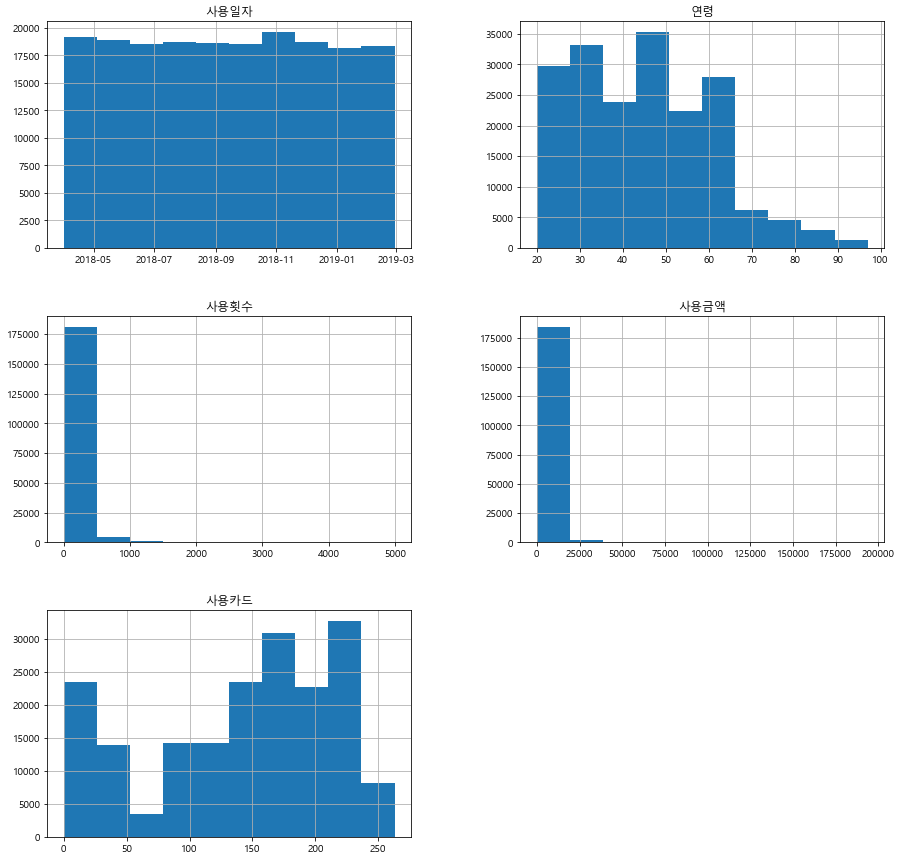

In [41]:
df.hist(figsize=(15,15))

## Trend Chart

In [58]:
df_a = pd.DataFrame(df.groupby(['사용일자'])['사용금액'].agg('mean'))
df_a.head()

,사용금액
사용일자,
2018-04-01,1684.874743
2018-04-02,1333.434470
2018-04-03,1625.023636
2018-04-04,1266.487854
2018-04-05,1363.111554


<AxesSubplot:xlabel='사용일자'>

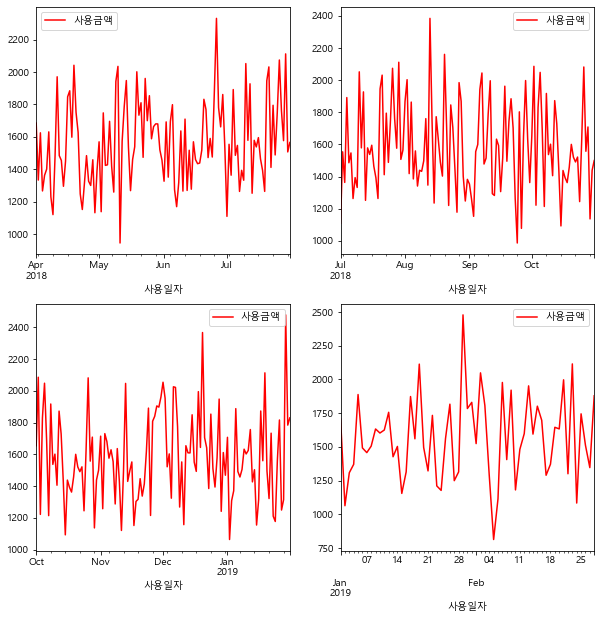

In [83]:
figure, ((ax1,ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(10,10)

df_a['2018-04':'2018-07'].plot(ax=ax1, color = 'red')
df_a['2018-07':'2018-10'].plot(ax=ax2, color = 'red')
df_a['2018-10':'2019-01'].plot(ax=ax3, color = 'red')
df_a['2019-01':'2019-03'].plot(ax=ax4, color = 'red')

> 트렌드 차트 분석 결과 일자에 따른 금액의 변동은 심하다고 할 수 있다. 특히 가장 소비금액이 낮은 구간대는 19년도 2월 초(약 2월 4일), 18년도에서 5월, 9월 후반대가 있다. 확인해보니 가게를 열지 않는 공휴일이나 연휴(추석)일 때 사용금액이 작아지는 경향이 있음을 알 수 있다.

In [ ]:
############################

## Box Plot

<AxesSubplot:title={'center':'사용금액'}, xlabel='[연령대]'>

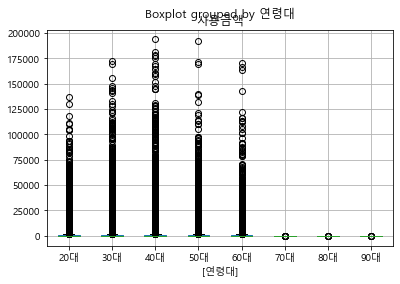

In [90]:
df.boxplot(column="사용금액", by=["연령대"])

> 연령대별 사용금액에 대한 box plot을 보면 20-60대에서는 활발한 소비가 이루어지나, 70대 이상부터는 큰 소비가 없는 것을 볼 수 있다.

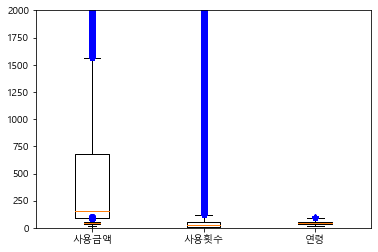

In [61]:
fig, ax = plt.subplots()

ax.boxplot([df['사용금액'], df['사용횟수'], df['연령']], sym="b*")
plt.boxplot(df['연령'], sym="bo")
plt.xticks([1,2,3], ['사용금액', '사용횟수', '연령'])
plt.ylim([0,2000]) ### 줄여가면서 보기
plt.show()

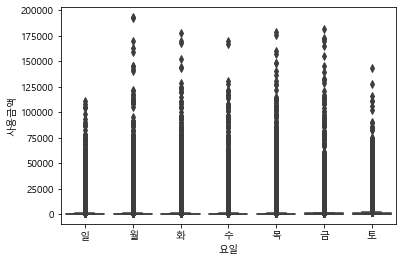

In [99]:
sns.boxplot(x="요일", y="사용금액", data=df)
plt.show()

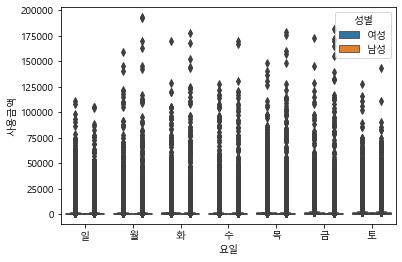

In [100]:
sns.boxplot(x="요일", y="사용금액", hue = "성별", data=df)
plt.show()

> 일요일의 사용금액이 가장 작은데 일요일을 제외하고 나머지 요일에 대해서는 남성이 사용금액이 분포가 넓게 퍼져있다는 것을(크다는 것) 알 수 있다. 왜??

## Heatmap

<AxesSubplot:xlabel='사용횟수', ylabel='성별'>

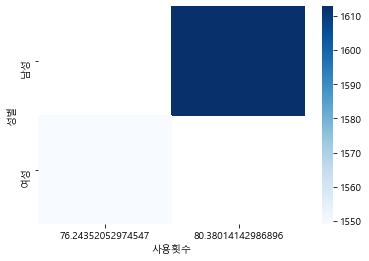

In [64]:
df_agg = df.groupby(['성별'],as_index = False).agg("mean")
df_pivot = df_agg.pivot('성별','사용횟수','사용금액')
sns.heatmap(df_pivot,cmap = "Blues")

## Scatter Matrix

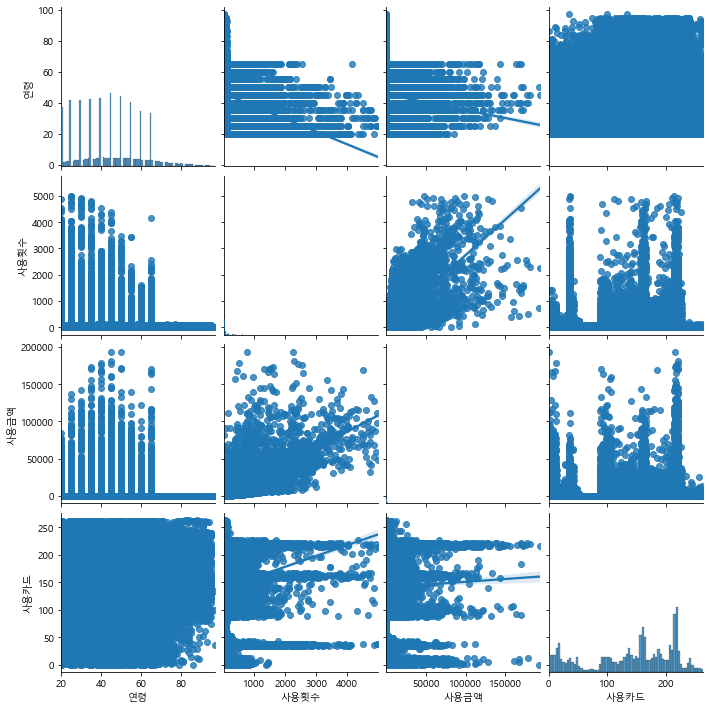

In [7]:
sns.pairplot(df,kind="reg")

In [84]:
# df_agg = df.groupby(['사용횟수'],as_index = False).agg("mean")
# df_pivot = df_agg.pivot('사용횟수','사용금액')
# sns.heatmap(df_pivot,cmap = "Blues")


<AxesSubplot:xlabel='소비처', ylabel='사용금액'>

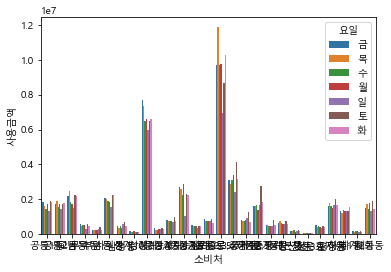

In [38]:
df_by_group_label = df.groupby(['소비처','요일'])['사용금액'].sum().reset_index()
sns.barplot(x='소비처',y = '사용금액', hue = '요일', data=df_by_group_label)


> ##### 교수님 피드백 : 요일별 업종별 특성을 본다거나.. 20대 30대 40대 범주별로 본다거나...

## 합한 데이터

In [47]:
# 데이터 불러오기
df = pd.read_csv("new_card_spending.csv", parse_dates = ["사용일자"])
df_data = pd.read_csv("Card_data_3.csv", encoding='euc-kr')
df_merge = pd.merge(df,df_data, how='left', left_on='사용카드', right_on='Card_ID')
df_merge

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,...,요일,Unnamed: 0,Card_ID,분류,혜택분야,소개,연회비,옵션,카드명,가족카드여부
0,2018-04-01,노원구,상계2동,노원구 상계2동,자동차정비,여성,42,3,56,82,...,일,82.0,82.0,체크카드,public,내게 꼭 필요한 생활서비스 이용 시 학자금 대출 상환 포인트 적립 학자금 대출 부담...,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",내미래 S카드 S20 체크,0.0
1,2018-04-01,종로구,혜화동,종로구 혜화동,유통업,여성,43,2,50,61,...,일,61.0,61.0,체크카드,travel,신한카드 스포츠누리로 보다 특별한 스포츠 할인 혜택을 누리세요!,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",S카드 스포츠누리 체크,0.0
2,2018-04-01,노원구,"상계6,7동","노원구 상계6,7동",레저업소,남성,50,2,59,140,...,일,140.0,140.0,신용카드,shopping,세상을 복음의 빛으로 바꾸는 GOOD 카드,있음,"후불교통가능, IC기능 탑재, 가족카드 가능",GOOD S카드 Style-S,1.0
3,2018-04-01,종로구,"종로5,6가동","종로구 종로5,6가동",레저업소,남성,45,3,56,104,...,일,104.0,104.0,신용카드,life,"앞서가는 여성의 필수품, Lady카드!",있음,"후불교통가능, IC기능 탑재, 가족카드 가능",S카드 Lady,1.0
4,2018-04-01,노원구,중계4동,노원구 중계4동,음료식품,여성,38,2,57,103,...,일,103.0,103.0,신용카드,life,프리드라이프 상조회비 자동이체시 할인까지!,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",프리드라이프 GS칼텍스 S카드 S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187317,2019-02-28,노원구,상계10동,노원구 상계10동,서적문구,여성,30,5,56,212,...,목,212.0,212.0,신용카드,travel,레일리지 쌓고 SRT 이용시 혜택 받으세요!,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",SRT GS칼텍스 S카드 S,0.0
187318,2019-02-28,노원구,상계10동,노원구 상계10동,의료기관,남성,60,5,80,4,...,목,4.0,4.0,체크카드,life,미니언즈가 다 드림!,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",S카드 Deep Dream 체크\n(미니언즈),0.0
187319,2019-02-28,노원구,상계10동,노원구 상계10동,요식업소,여성,60,9,246,163,...,목,163.0,163.0,신용카드,food,해피포인트 가맹점 이용 시 10% 청구할인,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",해피포인트 GS칼텍스 S카드 BigPlus,0.0
187320,2019-02-28,노원구,상계10동,노원구 상계10동,요식업소,남성,55,18,203,164,...,목,164.0,164.0,신용카드,food,"대한민국 씨푸드의 선두주자 Steam Pot, 특별한 곳, 특별한 맛, 해물 샤브샤...",있음,"후불교통가능, IC기능 탑재, 가족카드 가능",스팀-폿 S카드,1.0


In [48]:
df_merge.isnull().sum()

사용일자          0
지역            0
소비처           0
주소            0
소비처업종         0
성별            0
연령            0
사용횟수          0
사용금액          0
사용카드          0
연령대           0
요일            0
Unnamed: 0    4
Card_ID       4
분류            4
혜택분야          4
소개            4
연회비           4
옵션            4
카드명           4
가족카드여부        4
dtype: int64

In [49]:
df_merge

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,...,요일,Unnamed: 0,Card_ID,분류,혜택분야,소개,연회비,옵션,카드명,가족카드여부
0,2018-04-01,노원구,상계2동,노원구 상계2동,자동차정비,여성,42,3,56,82,...,일,82.0,82.0,체크카드,public,내게 꼭 필요한 생활서비스 이용 시 학자금 대출 상환 포인트 적립 학자금 대출 부담...,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",내미래 S카드 S20 체크,0.0
1,2018-04-01,종로구,혜화동,종로구 혜화동,유통업,여성,43,2,50,61,...,일,61.0,61.0,체크카드,travel,신한카드 스포츠누리로 보다 특별한 스포츠 할인 혜택을 누리세요!,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",S카드 스포츠누리 체크,0.0
2,2018-04-01,노원구,"상계6,7동","노원구 상계6,7동",레저업소,남성,50,2,59,140,...,일,140.0,140.0,신용카드,shopping,세상을 복음의 빛으로 바꾸는 GOOD 카드,있음,"후불교통가능, IC기능 탑재, 가족카드 가능",GOOD S카드 Style-S,1.0
3,2018-04-01,종로구,"종로5,6가동","종로구 종로5,6가동",레저업소,남성,45,3,56,104,...,일,104.0,104.0,신용카드,life,"앞서가는 여성의 필수품, Lady카드!",있음,"후불교통가능, IC기능 탑재, 가족카드 가능",S카드 Lady,1.0
4,2018-04-01,노원구,중계4동,노원구 중계4동,음료식품,여성,38,2,57,103,...,일,103.0,103.0,신용카드,life,프리드라이프 상조회비 자동이체시 할인까지!,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",프리드라이프 GS칼텍스 S카드 S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187317,2019-02-28,노원구,상계10동,노원구 상계10동,서적문구,여성,30,5,56,212,...,목,212.0,212.0,신용카드,travel,레일리지 쌓고 SRT 이용시 혜택 받으세요!,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",SRT GS칼텍스 S카드 S,0.0
187318,2019-02-28,노원구,상계10동,노원구 상계10동,의료기관,남성,60,5,80,4,...,목,4.0,4.0,체크카드,life,미니언즈가 다 드림!,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",S카드 Deep Dream 체크\n(미니언즈),0.0
187319,2019-02-28,노원구,상계10동,노원구 상계10동,요식업소,여성,60,9,246,163,...,목,163.0,163.0,신용카드,food,해피포인트 가맹점 이용 시 10% 청구할인,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",해피포인트 GS칼텍스 S카드 BigPlus,0.0
187320,2019-02-28,노원구,상계10동,노원구 상계10동,요식업소,남성,55,18,203,164,...,목,164.0,164.0,신용카드,food,"대한민국 씨푸드의 선두주자 Steam Pot, 특별한 곳, 특별한 맛, 해물 샤브샤...",있음,"후불교통가능, IC기능 탑재, 가족카드 가능",스팀-폿 S카드,1.0


In [7]:
df_data.isnull().sum()

Unnamed: 0    0
Card_ID       0
분류            0
혜택분야          0
소개            0
연회비           0
옵션            0
카드명           0
가족카드여부        0
dtype: int64

In [8]:
df.isnull().sum()

사용일자     0
지역       0
소비처      0
주소       0
소비처업종    0
성별       0
연령       0
사용횟수     0
사용금액     0
사용카드     0
연령대      0
요일       0
dtype: int64

In [9]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187322 entries, 0 to 187321
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   사용일자        187322 non-null  datetime64[ns]
 1   지역          187322 non-null  object        
 2   소비처         187322 non-null  object        
 3   주소          187322 non-null  object        
 4   소비처업종       187322 non-null  object        
 5   성별          187322 non-null  object        
 6   연령          187322 non-null  int64         
 7   사용횟수        187322 non-null  int64         
 8   사용금액        187322 non-null  int64         
 9   사용카드        187322 non-null  int64         
 10  연령대         187322 non-null  object        
 11  요일          187322 non-null  object        
 12  Unnamed: 0  187318 non-null  float64       
 13  Card_ID     187318 non-null  float64       
 14  분류          187318 non-null  object        
 15  혜택분야        187318 non-null  object        
 16  소개

In [51]:
df_merge[df_merge["Card_ID"].isna() == True]

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,...,요일,Unnamed: 0,Card_ID,분류,혜택분야,소개,연회비,옵션,카드명,가족카드여부
8382,2018-04-16,종로구,평창동,종로구 평창동,직물,여성,84,19,112,263,...,월,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94699,2018-09-16,노원구,상계5동,노원구 상계5동,직물,여성,83,52,79,263,...,일,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144679,2018-12-13,종로구,"종로5,6가동","종로구 종로5,6가동",직물,남성,88,37,123,263,...,목,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167001,2019-01-22,종로구,무악동,종로구 무악동,직물,여성,82,3,95,263,...,화,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df_merge.dropna()

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,...,요일,Unnamed: 0,Card_ID,분류,혜택분야,소개,연회비,옵션,카드명,가족카드여부
0,2018-04-01,노원구,상계2동,노원구 상계2동,자동차정비,여성,42,3,56,82,...,일,82.0,82.0,체크카드,public,내게 꼭 필요한 생활서비스 이용 시 학자금 대출 상환 포인트 적립 학자금 대출 부담...,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",내미래 S카드 S20 체크,0.0
1,2018-04-01,종로구,혜화동,종로구 혜화동,유통업,여성,43,2,50,61,...,일,61.0,61.0,체크카드,travel,신한카드 스포츠누리로 보다 특별한 스포츠 할인 혜택을 누리세요!,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",S카드 스포츠누리 체크,0.0
2,2018-04-01,노원구,"상계6,7동","노원구 상계6,7동",레저업소,남성,50,2,59,140,...,일,140.0,140.0,신용카드,shopping,세상을 복음의 빛으로 바꾸는 GOOD 카드,있음,"후불교통가능, IC기능 탑재, 가족카드 가능",GOOD S카드 Style-S,1.0
3,2018-04-01,종로구,"종로5,6가동","종로구 종로5,6가동",레저업소,남성,45,3,56,104,...,일,104.0,104.0,신용카드,life,"앞서가는 여성의 필수품, Lady카드!",있음,"후불교통가능, IC기능 탑재, 가족카드 가능",S카드 Lady,1.0
4,2018-04-01,노원구,중계4동,노원구 중계4동,음료식품,여성,38,2,57,103,...,일,103.0,103.0,신용카드,life,프리드라이프 상조회비 자동이체시 할인까지!,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",프리드라이프 GS칼텍스 S카드 S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187317,2019-02-28,노원구,상계10동,노원구 상계10동,서적문구,여성,30,5,56,212,...,목,212.0,212.0,신용카드,travel,레일리지 쌓고 SRT 이용시 혜택 받으세요!,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",SRT GS칼텍스 S카드 S,0.0
187318,2019-02-28,노원구,상계10동,노원구 상계10동,의료기관,남성,60,5,80,4,...,목,4.0,4.0,체크카드,life,미니언즈가 다 드림!,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",S카드 Deep Dream 체크\n(미니언즈),0.0
187319,2019-02-28,노원구,상계10동,노원구 상계10동,요식업소,여성,60,9,246,163,...,목,163.0,163.0,신용카드,food,해피포인트 가맹점 이용 시 10% 청구할인,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",해피포인트 GS칼텍스 S카드 BigPlus,0.0
187320,2019-02-28,노원구,상계10동,노원구 상계10동,요식업소,남성,55,18,203,164,...,목,164.0,164.0,신용카드,food,"대한민국 씨푸드의 선두주자 Steam Pot, 특별한 곳, 특별한 맛, 해물 샤브샤...",있음,"후불교통가능, IC기능 탑재, 가족카드 가능",스팀-폿 S카드,1.0


In [53]:
df_merge = df_merge.drop(['Card_ID','Unnamed: 0'],axis = 1)
df_merge

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,연령대,요일,분류,혜택분야,소개,연회비,옵션,카드명,가족카드여부
0,2018-04-01,노원구,상계2동,노원구 상계2동,자동차정비,여성,42,3,56,82,40대,일,체크카드,public,내게 꼭 필요한 생활서비스 이용 시 학자금 대출 상환 포인트 적립 학자금 대출 부담...,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",내미래 S카드 S20 체크,0.0
1,2018-04-01,종로구,혜화동,종로구 혜화동,유통업,여성,43,2,50,61,40대,일,체크카드,travel,신한카드 스포츠누리로 보다 특별한 스포츠 할인 혜택을 누리세요!,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",S카드 스포츠누리 체크,0.0
2,2018-04-01,노원구,"상계6,7동","노원구 상계6,7동",레저업소,남성,50,2,59,140,50대,일,신용카드,shopping,세상을 복음의 빛으로 바꾸는 GOOD 카드,있음,"후불교통가능, IC기능 탑재, 가족카드 가능",GOOD S카드 Style-S,1.0
3,2018-04-01,종로구,"종로5,6가동","종로구 종로5,6가동",레저업소,남성,45,3,56,104,40대,일,신용카드,life,"앞서가는 여성의 필수품, Lady카드!",있음,"후불교통가능, IC기능 탑재, 가족카드 가능",S카드 Lady,1.0
4,2018-04-01,노원구,중계4동,노원구 중계4동,음료식품,여성,38,2,57,103,30대,일,신용카드,life,프리드라이프 상조회비 자동이체시 할인까지!,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",프리드라이프 GS칼텍스 S카드 S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187317,2019-02-28,노원구,상계10동,노원구 상계10동,서적문구,여성,30,5,56,212,30대,목,신용카드,travel,레일리지 쌓고 SRT 이용시 혜택 받으세요!,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",SRT GS칼텍스 S카드 S,0.0
187318,2019-02-28,노원구,상계10동,노원구 상계10동,의료기관,남성,60,5,80,4,60대,목,체크카드,life,미니언즈가 다 드림!,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",S카드 Deep Dream 체크\n(미니언즈),0.0
187319,2019-02-28,노원구,상계10동,노원구 상계10동,요식업소,여성,60,9,246,163,60대,목,신용카드,food,해피포인트 가맹점 이용 시 10% 청구할인,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",해피포인트 GS칼텍스 S카드 BigPlus,0.0
187320,2019-02-28,노원구,상계10동,노원구 상계10동,요식업소,남성,55,18,203,164,50대,목,신용카드,food,"대한민국 씨푸드의 선두주자 Steam Pot, 특별한 곳, 특별한 맛, 해물 샤브샤...",있음,"후불교통가능, IC기능 탑재, 가족카드 가능",스팀-폿 S카드,1.0


In [54]:
df_merge = df_merge.dropna()

<AxesSubplot:xlabel='소비처업종', ylabel='사용금액'>

C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Gl

C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51088 

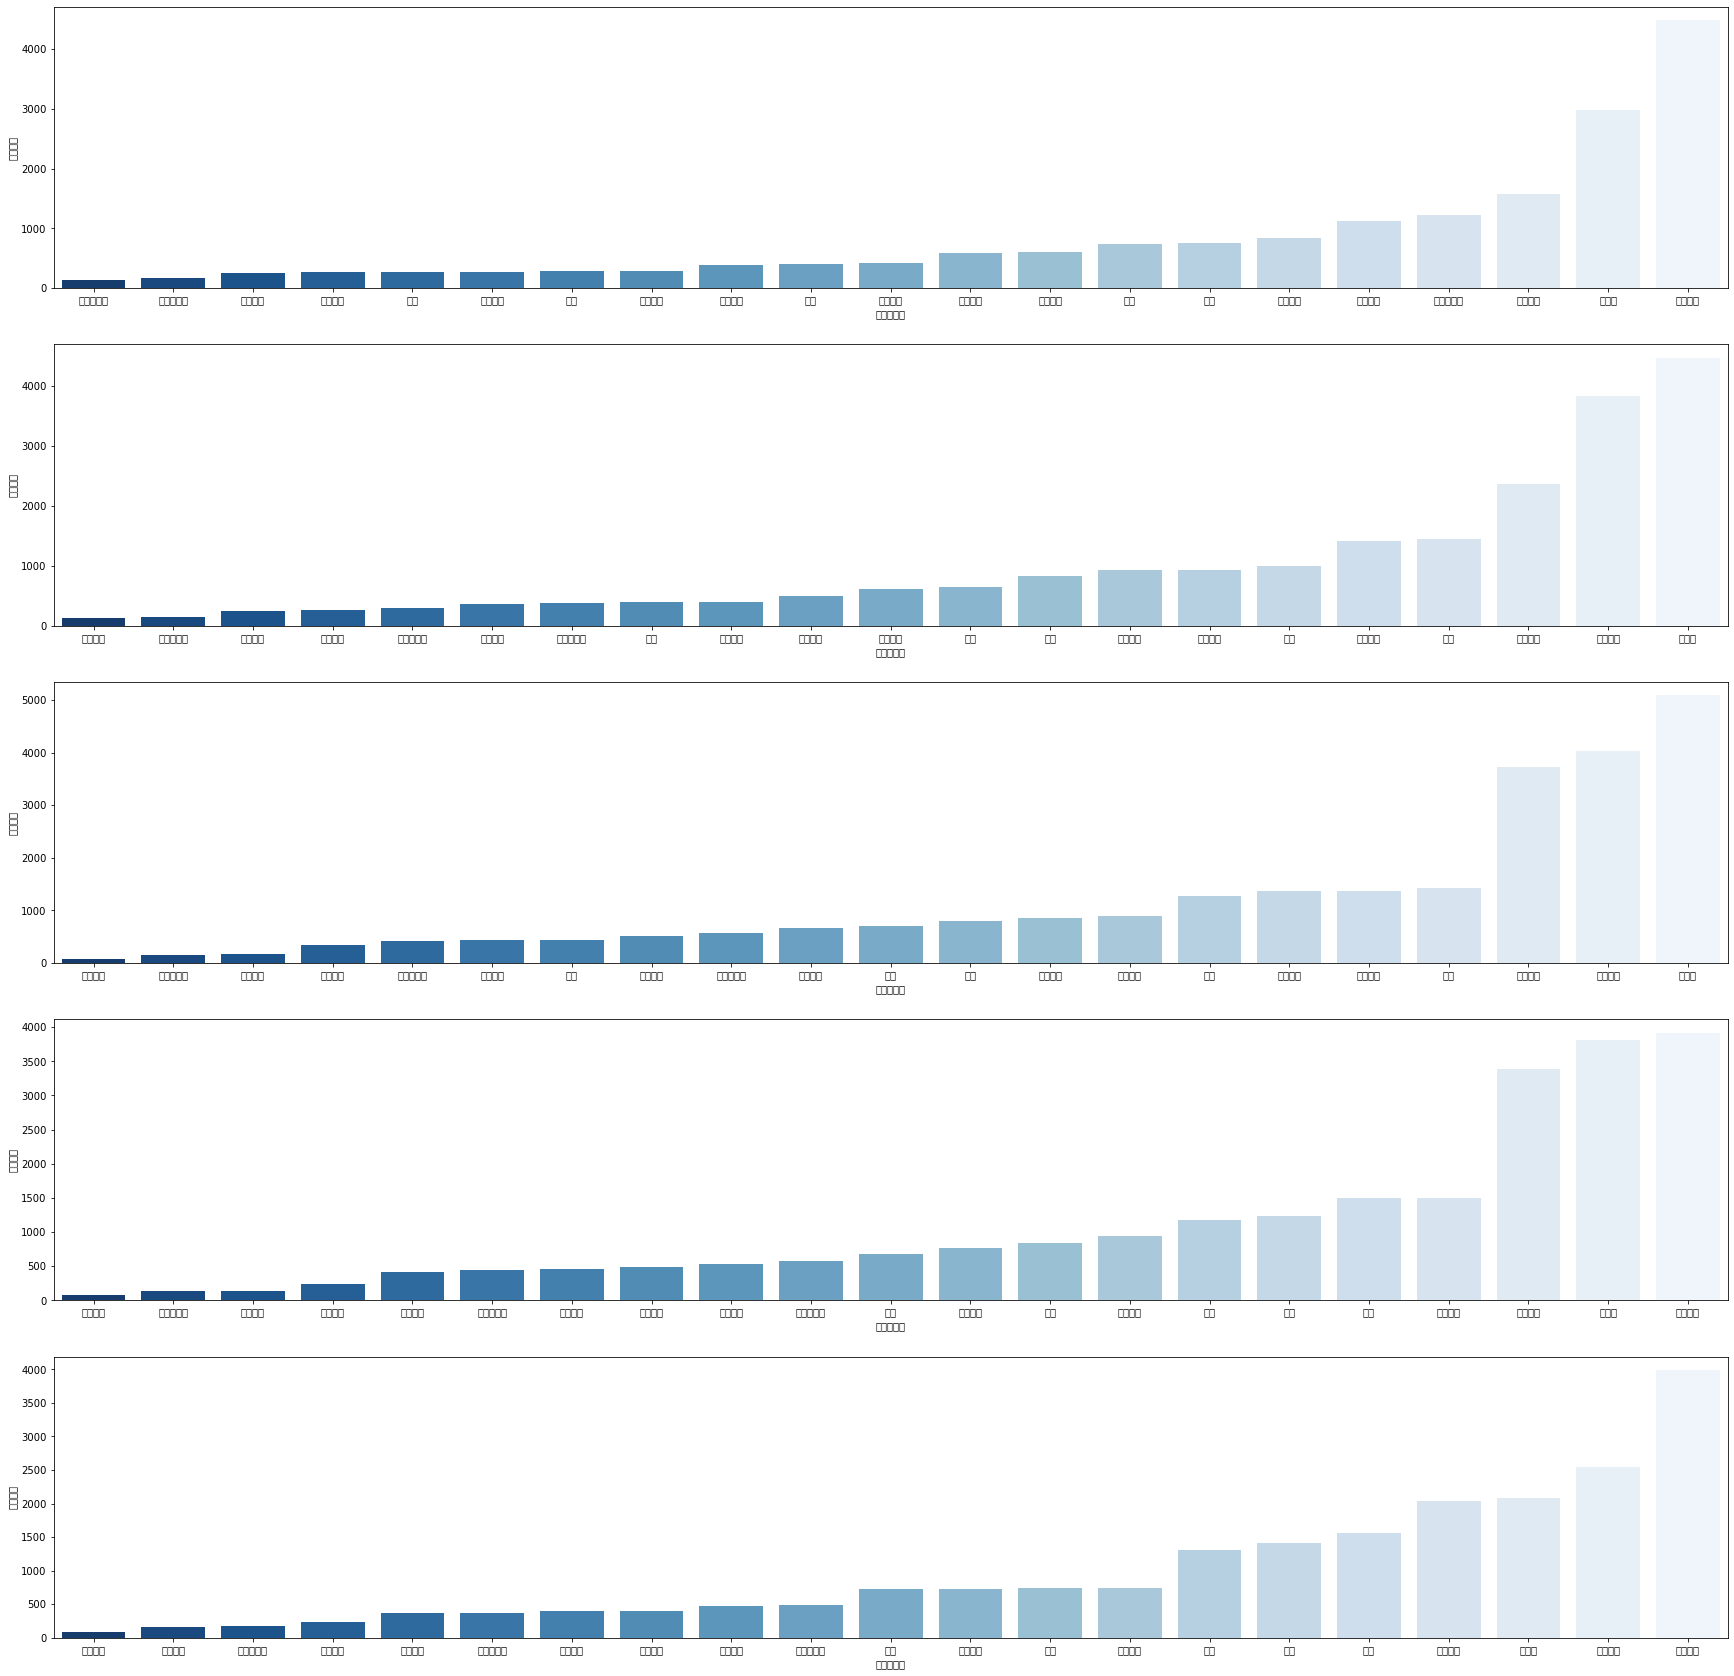

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

In [15]:
df_1 = df[df['연령대'] == '20대']
df_2 = df[df['연령대'] == '30대']
df_3 = df[df['연령대'] == '40대']
df_4 = df[df['연령대'] == '50대']
df_5 = df[df['연령대'] == '60대']

figure, ((ax1),(ax2),(ax3),(ax4),(ax5)) = plt.subplots(nrows=5, ncols=1)
figure.set_size_inches(30,30)

age_group_money = df_1.pivot_table(index= "소비처업종", values="사용금액").sort_values(by="사용금액", ascending=True)
plt.figure(figsize = (12,4))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용금액", ax= ax1, palette = "Blues_r")

age_group_money = df_2.pivot_table(index= "소비처업종", values="사용금액").sort_values(by="사용금액", ascending=True)
plt.figure(figsize = (12,4))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용금액", ax= ax2, palette = "Blues_r")

age_group_money = df_3.pivot_table(index= "소비처업종", values="사용금액").sort_values(by="사용금액", ascending=True)
plt.figure(figsize = (12,4))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용금액", ax= ax3, palette = "Blues_r")

age_group_money = df_4.pivot_table(index= "소비처업종", values="사용금액").sort_values(by="사용금액", ascending=True)
plt.figure(figsize = (12,4))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용금액", ax= ax4, palette = "Blues_r")

age_group_money = df_5.pivot_table(index= "소비처업종", values="사용금액").sort_values(by="사용금액", ascending=True)
plt.figure(figsize = (12,4))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용금액", ax= ax5, palette = "Blues_r")

<AxesSubplot:xlabel='혜택분야', ylabel='사용횟수'>

C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54812 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Gl

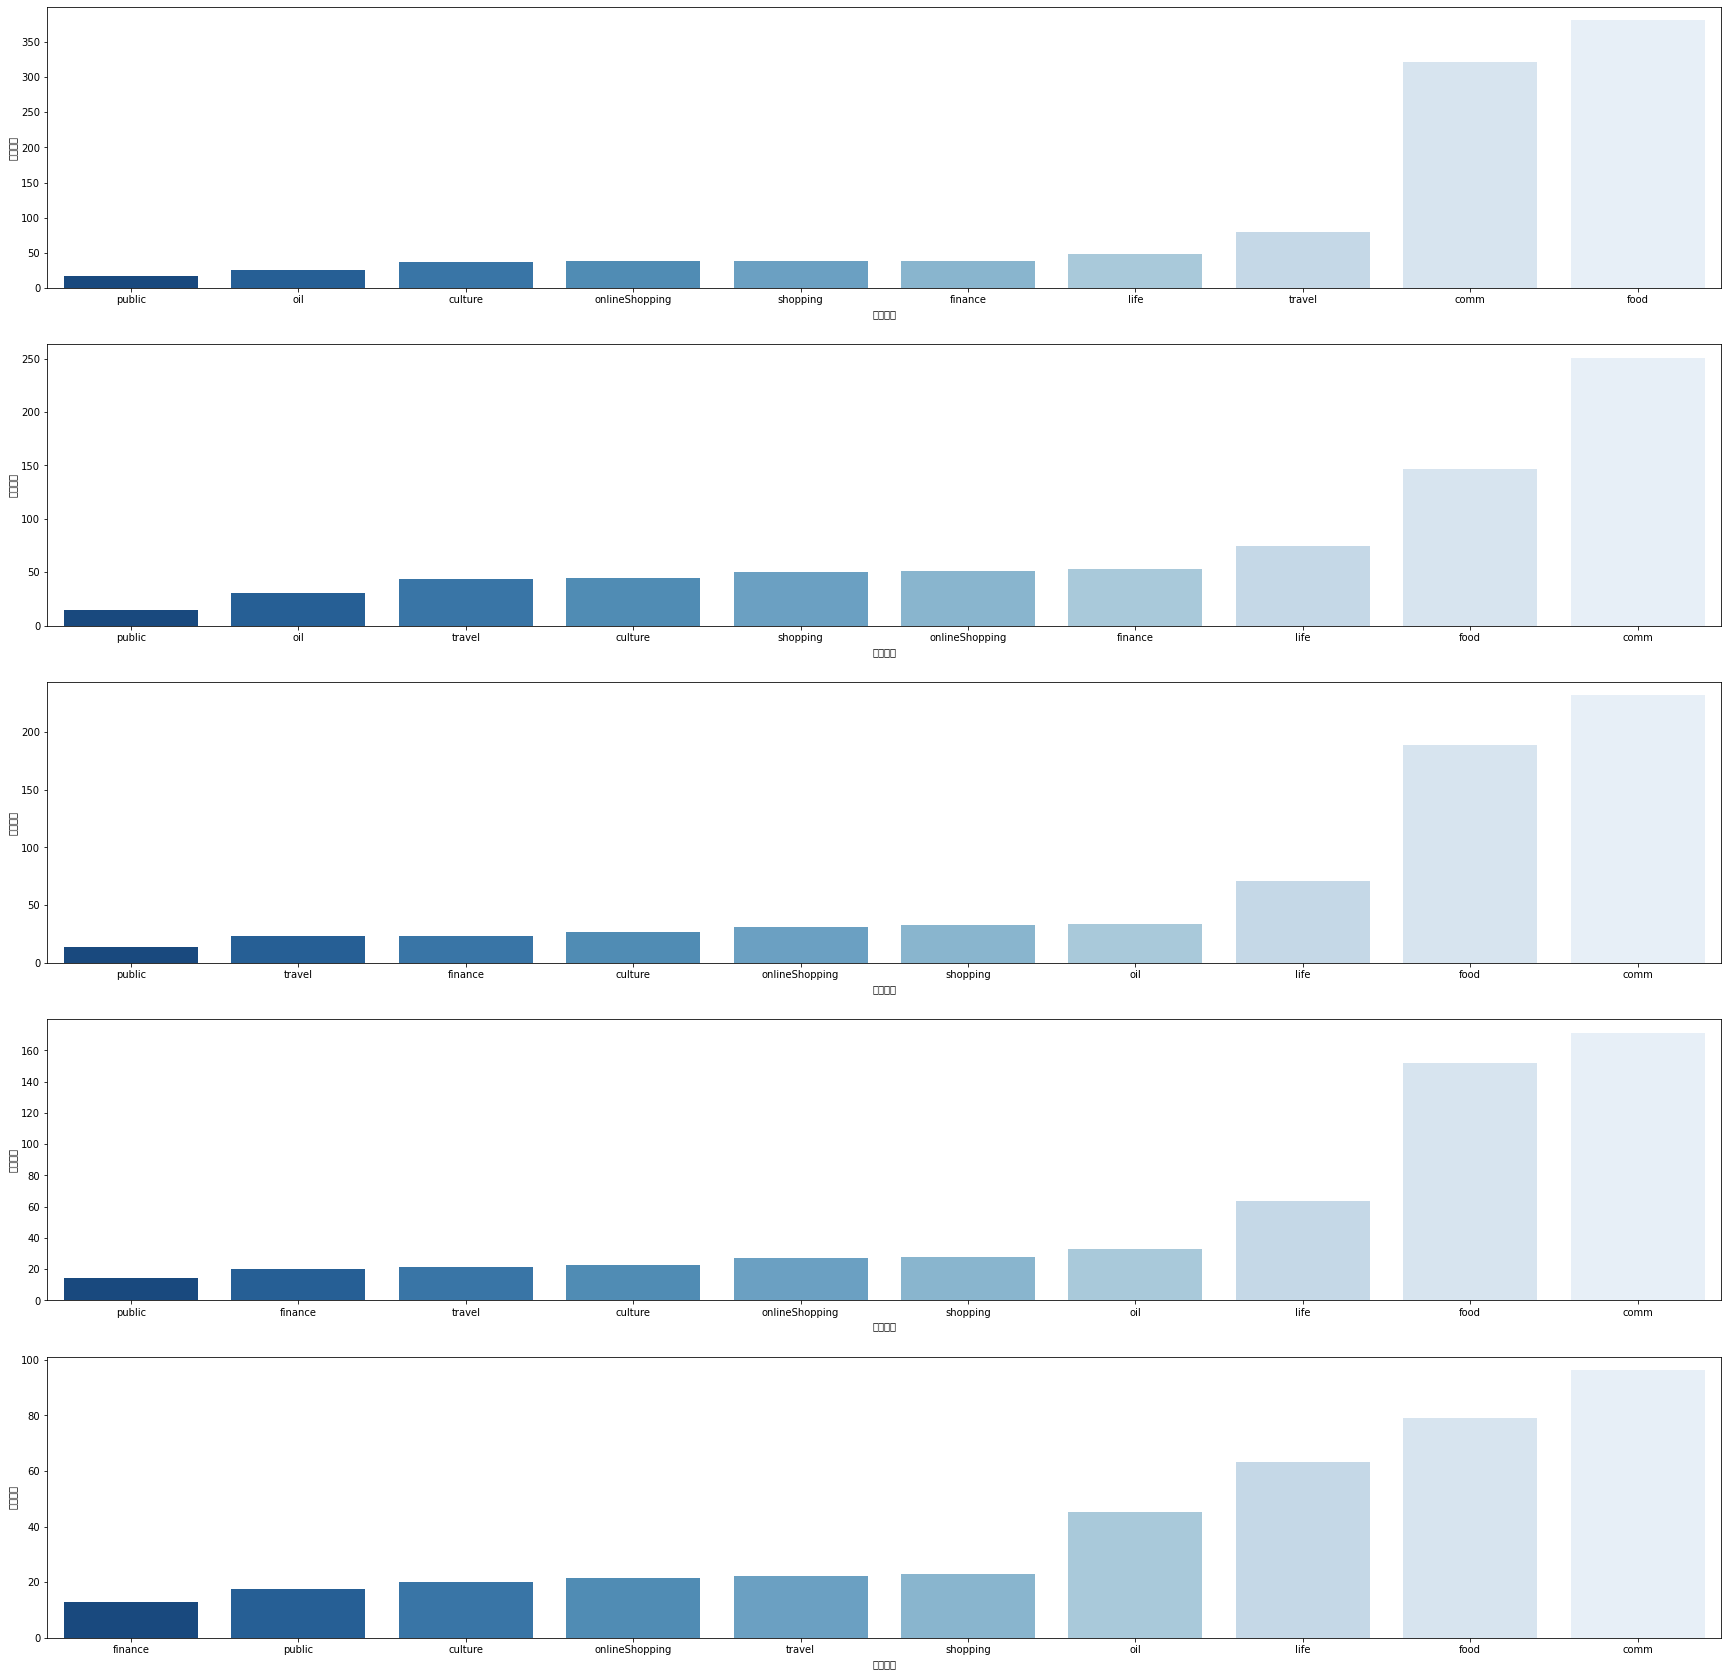

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

In [16]:
df_1 = df_merge[df_merge['연령대'] == '20대']
df_2 = df_merge[df_merge['연령대'] == '30대']
df_3 = df_merge[df_merge['연령대'] == '40대']
df_4 = df_merge[df_merge['연령대'] == '50대']
df_5 = df_merge[df_merge['연령대'] == '60대']

figure, ((ax1),(ax2),(ax3),(ax4),(ax5)) = plt.subplots(nrows=5, ncols=1)
figure.set_size_inches(30,30)

age_group_money = df_1.pivot_table(index= "혜택분야", values="사용횟수").sort_values(by="사용횟수", ascending=True)
plt.figure(figsize = (12,4))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용횟수", ax= ax1, palette = "Blues_r")

age_group_money = df_2.pivot_table(index= "혜택분야", values="사용횟수").sort_values(by="사용횟수", ascending=True)
plt.figure(figsize = (12,4))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용횟수", ax= ax2, palette = "Blues_r")

age_group_money = df_3.pivot_table(index= "혜택분야", values="사용횟수").sort_values(by="사용횟수", ascending=True)
plt.figure(figsize = (12,4))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용횟수", ax= ax3, palette = "Blues_r")

age_group_money = df_4.pivot_table(index=  "혜택분야", values="사용횟수").sort_values(by="사용횟수", ascending=True)
plt.figure(figsize = (12,4))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용횟수", ax= ax4, palette = "Blues_r")

age_group_money = df_5.pivot_table(index=  "혜택분야", values="사용횟수").sort_values(by="사용횟수", ascending=True)
plt.figure(figsize = (12,4))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용횟수", ax= ax5, palette = "Blues_r")

<AxesSubplot:xlabel='혜택분야', ylabel='사용횟수'>

C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54812 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Gl

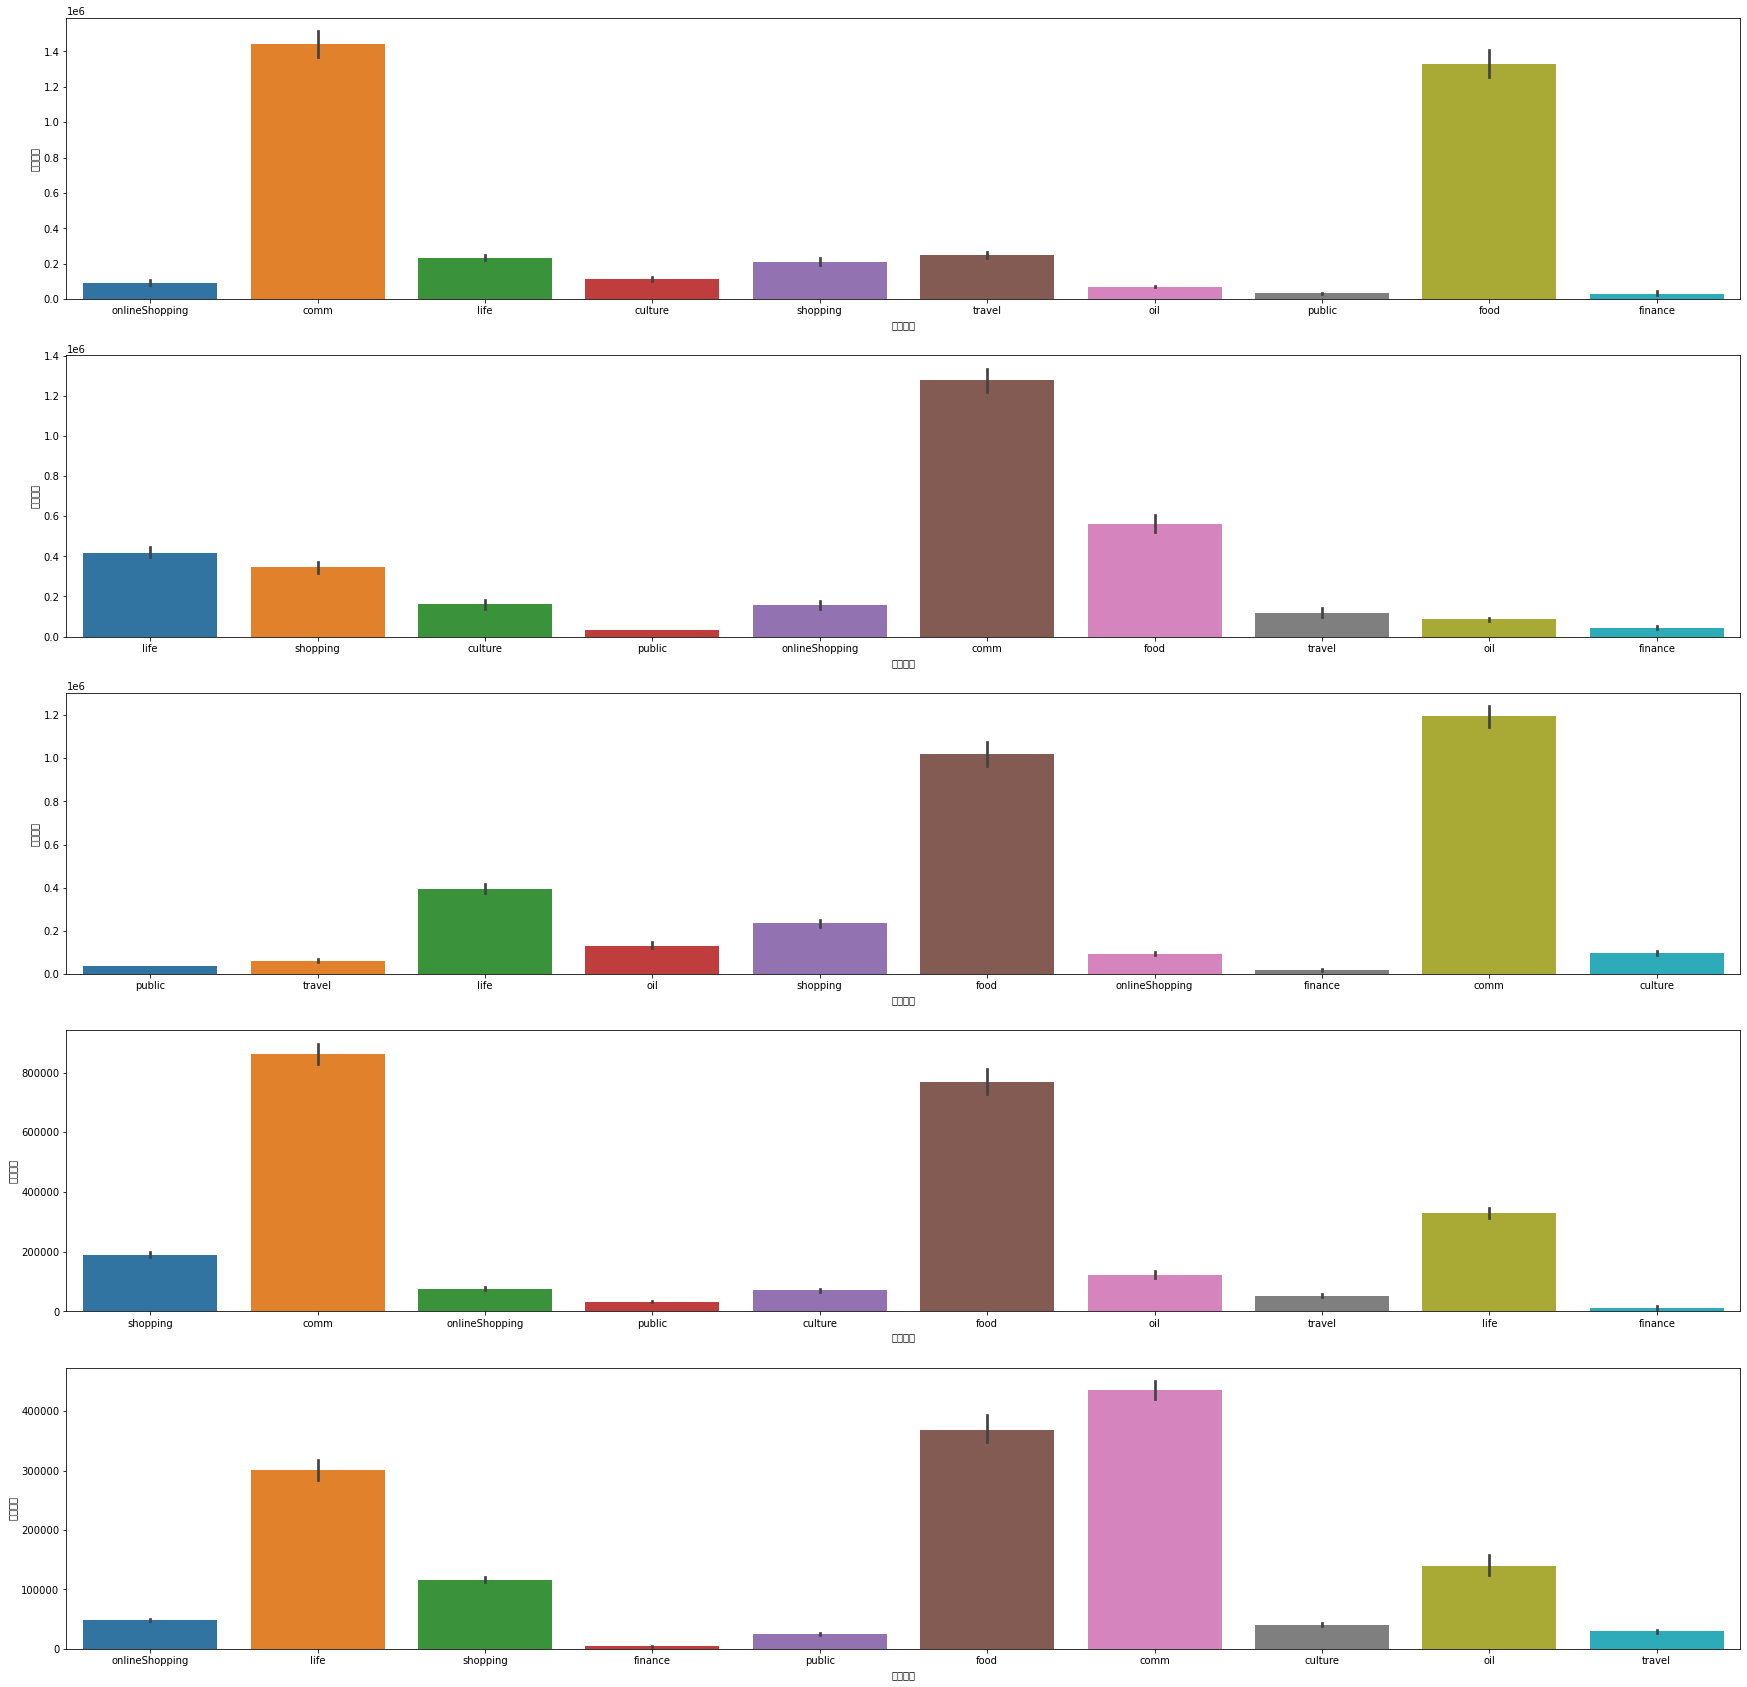

In [17]:
df_1 = df_merge[df_merge['연령대'] == '20대']
df_2 = df_merge[df_merge['연령대'] == '30대']
df_3 = df_merge[df_merge['연령대'] == '40대']
df_4 = df_merge[df_merge['연령대'] == '50대']
df_5 = df_merge[df_merge['연령대'] == '60대']

figure, ((ax1),(ax2),(ax3),(ax4),(ax5)) = plt.subplots(nrows=5, ncols=1)
figure.set_size_inches(30,30)

sns.barplot(data = df_1, x = "혜택분야", y = "사용횟수", ax=ax1, estimator=sum) # 20대 mean
sns.barplot(data = df_2, x = "혜택분야", y = "사용횟수", ax=ax2, estimator=sum) # 30대 
sns.barplot(data = df_3, x = "혜택분야", y = "사용횟수", ax=ax3, estimator=sum) # 40대 
sns.barplot(data = df_4, x = "혜택분야", y = "사용횟수", ax=ax4, estimator=sum) # 50대 
sns.barplot(data = df_5, x = "혜택분야", y = "사용횟수", ax=ax5, estimator=sum) # 60대 

# sns.barplot(data = df_5, x = "소비처업종", y = "사용금액", ax=ax5, estimator=sum) # 60대 

<ipython-input-221-e2fca72ab331>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['연령대'] = '청년'
<ipython-input-221-e2fca72ab331>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['연령대'] = '중장년'


<AxesSubplot:xlabel='혜택분야', ylabel='사용금액'>

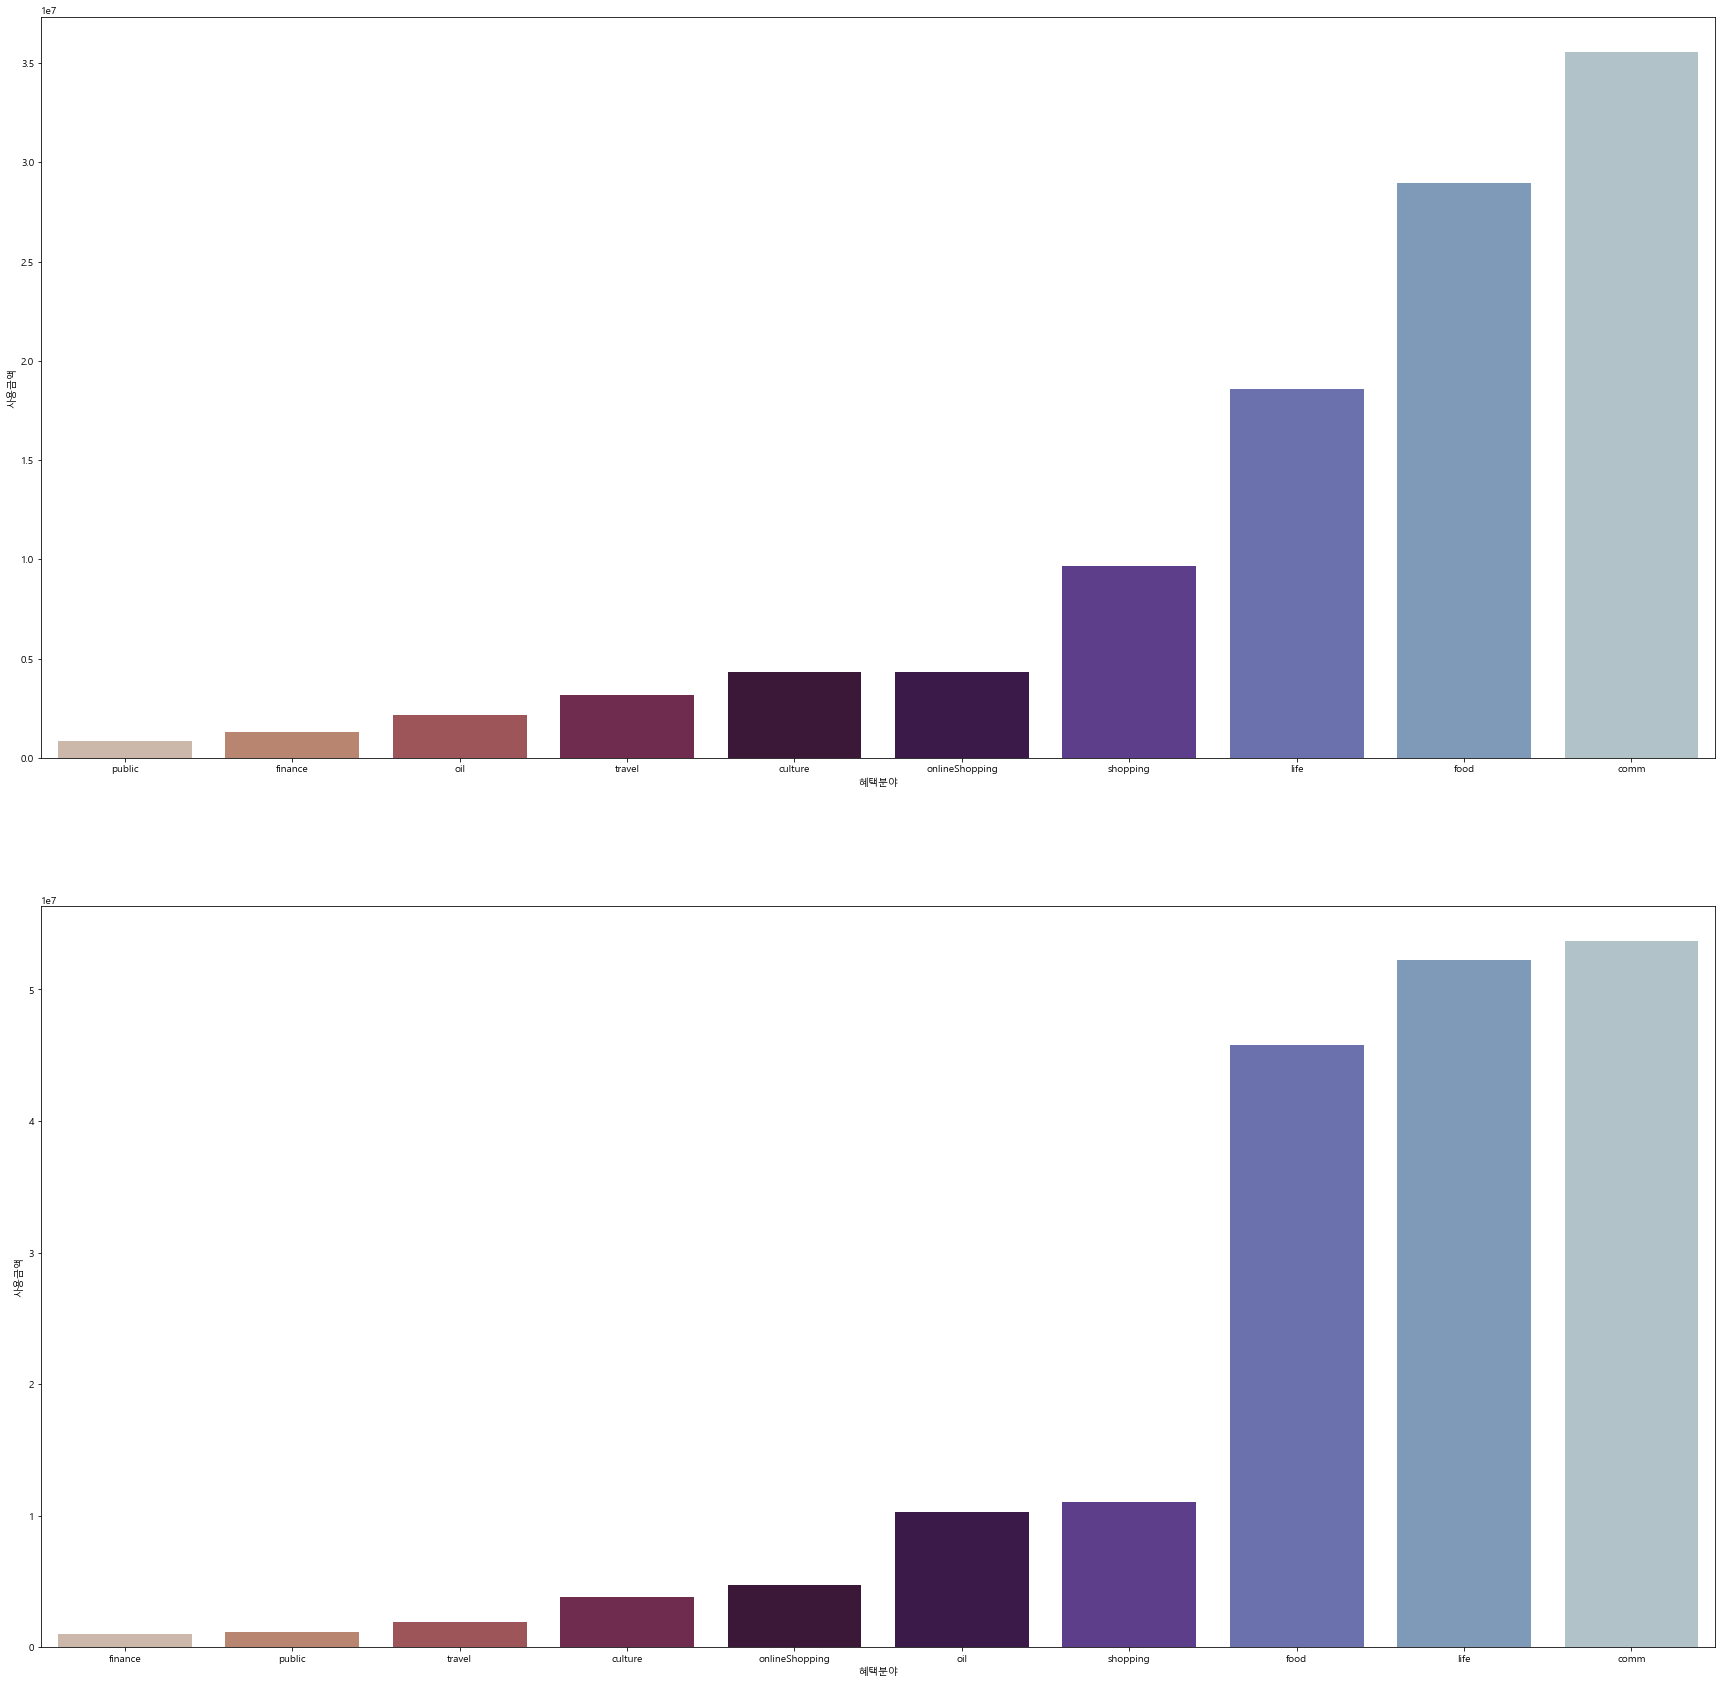

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [221]:
figure, ((ax1),(ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(30,30)

df_1 = df_merge[(df_merge['연령대'] == '20대')| (df_merge['연령대'] == '30대')]
df_1['연령대'] = '청년'

df_2 = df_merge[(df_merge['연령대'] == '40대')| (df_merge['연령대'] == '50대')| (df_merge['연령대'] == '60대')]
df_2['연령대'] = '중장년'

age_group_money1 = df_1.pivot_table(index= "혜택분야", values="사용금액",aggfunc='sum').sort_values(by="사용금액", ascending=True)
plt.figure(figsize = (20,10))
sns.barplot(data=age_group_money1, x=age_group_money1.index, y="사용금액", ax = ax1, palette = "twilight_r",estimator= sum)

age_group_money2 = df_2.pivot_table(index= "혜택분야", values="사용금액",aggfunc='sum').sort_values(by="사용금액", ascending=True)
plt.figure(figsize = (20,10))
sns.barplot(data=age_group_money2, x=age_group_money2.index, y="사용금액", ax = ax2, palette = "twilight_r",estimator= sum)

In [223]:
age_group_money1

,사용금액
혜택분야,
public,851230
finance,1324372
oil,2173312
travel,3152998
culture,4339722
onlineShopping,4344140
shopping,9644083
life,18573520
food,28958775


In [224]:
age_group_money2

,사용금액
혜택분야,
finance,1037166
public,1200109
travel,1948536
culture,3835136
onlineShopping,4723243
oil,10259572
shopping,11046874
food,45756885
life,52268422


In [ ]:
figure, ((ax1),(ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(30,30)

df_1 = df_1.groupby('혜택분야').sum()
df_1 = df_1.sort_values(by = '사용횟수',ascending =True)
df_1['사용횟수'].plot(kind='bar')
plt.xlabel('혜택분야')
plt.ylabel('사용횟수')
plt.title('20대 카드 사용횟수')

sns.barplot(data = df_merge, x = "혜택분야", y = "사용횟수", ax=ax1, estimator=sum) # 20대 mean
sns.barplot(data = df_merge, x = "혜택분야", y = "사용금액", ax=ax2, estimator=sum)

> 혜택별 사용 횟수는 통신 > 음식 > 일상생활 > 여행 > 쇼핑 > 온라인 쇼핑 > 기름 > 금융 > 문화 > 대중적?(public) 순으로 높다. 의료 혜택, 유통 혜택이 없으니까 택배 할인이나 의료 계통 추가 하면 좋을듯 

In [ ]:
age_group_money = df_merge.pivot_table(index= "혜택분야", values="사용횟수").sort_values(by="사용횟수", ascending=True)
plt.figure(figsize = (12,4))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용횟수", palette = "Blues_r")


In [ ]:
age_group_money = df_merge.pivot_table(index= "혜택분야", values="사용금액").sort_values(by="사용금액", ascending=True)
plt.figure(figsize = (12,4))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용금액", palette = "Blues_r")


In [ ]:
df_1 = df_merge[df_merge['연령대'] == '20대']
df_2 = df_merge[df_merge['연령대'] == '30대']
df_3 = df_merge[df_merge['연령대'] == '40대']
df_4 = df_merge[df_merge['연령대'] == '50대']
df_5 = df_merge[df_merge['연령대'] == '60대']

# df_4 = df_4.groupby('혜택분야').sum()
# df_4 = df_4.sort_values(by = '사용횟수',ascending =False)
# df_4['사용횟수'].plot(kind='bar')

# figure, ((ax1),(ax2),(ax3),(ax4),(ax5)) = plt.subplots(nrows=5, ncols=1)
# figure.set_size_inches(30,30)

df_1 = df_1.groupby('혜택분야').sum()
df_1 = df_1.sort_values(by = '사용횟수',ascending =True)
df_1['사용횟수'].plot(kind='bar')
plt.xlabel('혜택분야')
plt.ylabel('사용횟수')
plt.title('20대 카드 사용횟수')

In [ ]:

df_2 = df_2.groupby('혜택분야').sum()
df_2 = df_2.sort_values(by = '사용금액',ascending =True)
df_2['사용금액'].plot(kind='bar')
plt.xlabel('혜택분야')
plt.ylabel('사용금액')
plt.title('30대 카드 사용금액')

In [ ]:
df_1 = df_1.groupby('혜택분야').sum()
df_1 = df_1.sort_values(by = '사용금액',ascending =True)
df_1['사용금액'].plot(kind='bar')
plt.xlabel('혜택분야')
plt.ylabel('사용금액')
plt.title('20대 카드 사용금액')

In [ ]:
df_3 = df_3.groupby('혜택분야').sum()
df_3 = df_3.sort_values(by = '사용금액',ascending =True)
df_3['사용금액'].plot(kind='bar')
plt.xlabel('혜택분야')
plt.ylabel('사용금액')
plt.title('40대 카드 사용금액')

In [ ]:
df_4 = df_4.groupby('혜택분야').sum()
df_4 = df_4.sort_values(by = '사용금액',ascending =True)
df_4['사용금액'].plot(kind='bar')
plt.xlabel('혜택분야')
plt.ylabel('사용금액')
plt.title('50대 카드 사용금액')

In [ ]:
df_5 = df_5.groupby('혜택분야').sum()
df_5 = df_5.sort_values(by = '사용금액',ascending =True)
df_5['사용금액'].plot(kind='bar')
plt.xlabel('혜택분야')
plt.ylabel('사용금액')
plt.title('60대 카드 사용금액')

In [ ]:
age_group_money = df_merge.pivot_table(index= "혜택분야", values="사용횟수").sort_values(by="사용횟수", ascending=True)
plt.figure(figsize = (12,4))
sns.barplot(data=age_group_money, x=age_group_money.index, y="사용횟수", palette = "Blues_r")

In [ ]:
df_merge.isnull().sum()

In [ ]:
df_merge['혜택분야'].uniqueque()

In [41]:
df_merge[df_merge['연령']>=70]

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,연령대,요일,분류,혜택분야,소개,연회비,옵션,카드명,가족카드여부
13,2018-04-01,종로구,청운효자동,종로구 청운효자동,보건위생,남성,81,5,58,246,80대,일,신용카드,public,"통합 장애인복지카드 한장으로, 장애인증, 지하철 무임승차, 고속도로 통행료 감면 등...",면제,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",장애인 통합복지 S카드 Lady,0.0
38,2018-04-01,종로구,"종로5,6가동","종로구 종로5,6가동",서적문구,남성,83,7,189,97,80대,일,신용카드,life,"할인과 적립, 금융혜택을 동시에!",있음,"후불교통가능, IC기능 탑재, 가족카드 가능, 점자카드 발급 가능",S카드 Love,1.0
40,2018-04-01,노원구,상계5동,노원구 상계5동,보건위생,남성,77,54,82,159,70대,일,신용카드,food,CJ그룹의 실속있는 혜택을 누리세요. 즐거움이 2배!!,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",The CJ GS칼텍스 S카드 BigPlus,0.0
49,2018-04-01,노원구,상계10동,노원구 상계10동,수리서비스,남성,71,31,161,240,70대,일,신용카드,public,대한의사협회 소속 Doctor에게만 제공되는 특별한 혜택을 누리세요!,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",대한의사협회 The Dr. S카드 Simple Platinum#,0.0
50,2018-04-01,종로구,교남동,종로구 교남동,레저업소,여성,72,19,130,204,70대,일,신용카드,travel,"1,000원당 대한항공 1마일 적립, 항공/면세/해외 2배 적립!",있음,"후불교통가능, IC기능 탑재, 가족카드 가능",S카드 Air One,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186934,2019-02-28,종로구,"종로1,2,3,4가동","종로구 종로1,2,3,4가동",문화취미,남성,75,11,180,161,70대,목,신용카드,food,해피포인트 가맹점 이용 시 10% 청구할인,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",해피포인트 Lady 카드,0.0
186943,2019-02-28,노원구,하계2동,노원구 하계2동,음료식품,남성,77,14,155,52,70대,목,체크카드,culture,"앱마켓 5%, 스타벅스 20% 캐시백",없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",LineageM S카드 체크,1.0
186963,2019-02-28,종로구,무악동,종로구 무악동,사무통신,남성,75,41,97,211,70대,목,신용카드,travel,"차곡차곡 항공 포인트 쌓고, 내맘대로 쉽게 꺼내 쓰자!",있음,"후불교통가능, IC기능 탑재, 가족카드 가능",제주항공 Refresh Point S카드,1.0
186967,2019-02-28,노원구,"상계6,7동","노원구 상계6,7동",음료식품,남성,89,35,69,40,80대,목,체크카드,oil,전기차 LIFE를 누려보세요. 전기차 충전요금 30% 할인!,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",S카드 EV 체크,0.0


#### 70대 이상 제외(타켓층을 60대까지로 설정)

In [57]:
idx = df_merge[df_merge['연령']>=70].index
df_merge = df_merge.drop(idx)

In [58]:
df_merge['연령대'].unique()

array(['40대', '50대', '30대', '60대', '20대'], dtype=object)

In [161]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro
import matplotlib

## 예측
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y~X1+X2+...)
import statsmodels.formula.api as smf
# Scaling 클래스
from sklearn.preprocessing import scale, minmax_scale, robust_scale
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
# Ridge, Lasso, ElasticNet 패키지 불러오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet
# 데이터 분할: train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tress
from sklearn.tree import DecisionTreeRegressor
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
import graphviz
# MSE 계산
from sklearn.metrics import mean_squared_error
# MAE 계산
from sklearn.metrics import mean_absolute_error
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# Scale 변환: 평균, 표준편차 기준
from sklearn.preprocessing import StandardScaler

# 주성분 분석
from sklearn.decomposition import PCA
# 날짜 데이터 생성
from datetime import datetime
# 자기상관 함수, 부분 자기상관 함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# ARIMA
from statsmodels.tsa.arima_model import ARIMA


## 분류
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_curve, auc, recall_score


## 음수 표시
#plt.rc('axes', unicode_minus=False)
## 맑은 고딕 적용
#plt.rc("font", family="Malgun Gothic")

%matplotlib inline
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

from sklearn.linear_model import LogisticRegression
import itertools

## 혜택에 대한 사용금액/사용횟수에 차이가 있는지 검정(ANOVA)

In [61]:
df_merge.head()

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,연령대,요일,분류,혜택분야,소개,연회비,옵션,카드명,가족카드여부
0,2018-04-01,노원구,상계2동,노원구 상계2동,자동차정비,여성,42,3,56,82,40대,일,체크카드,public,내게 꼭 필요한 생활서비스 이용 시 학자금 대출 상환 포인트 적립 학자금 대출 부담...,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",내미래 S카드 S20 체크,0.0
1,2018-04-01,종로구,혜화동,종로구 혜화동,유통업,여성,43,2,50,61,40대,일,체크카드,travel,신한카드 스포츠누리로 보다 특별한 스포츠 할인 혜택을 누리세요!,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",S카드 스포츠누리 체크,0.0
2,2018-04-01,노원구,"상계6,7동","노원구 상계6,7동",레저업소,남성,50,2,59,140,50대,일,신용카드,shopping,세상을 복음의 빛으로 바꾸는 GOOD 카드,있음,"후불교통가능, IC기능 탑재, 가족카드 가능",GOOD S카드 Style-S,1.0
3,2018-04-01,종로구,"종로5,6가동","종로구 종로5,6가동",레저업소,남성,45,3,56,104,40대,일,신용카드,life,"앞서가는 여성의 필수품, Lady카드!",있음,"후불교통가능, IC기능 탑재, 가족카드 가능",S카드 Lady,1.0
4,2018-04-01,노원구,중계4동,노원구 중계4동,음료식품,여성,38,2,57,103,30대,일,신용카드,life,프리드라이프 상조회비 자동이체시 할인까지!,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",프리드라이프 GS칼텍스 S카드 S,0.0


In [126]:
for i in a:
    print(df_merge[df_merge['혜택분야']==i]['사용횟수'].agg('sum'))

160402
507832
1096773
1678275
466923
551790
480141
5215107
106526
4045872


In [155]:
# is_public = df_merge['혜택분야']=='public'
# public = df_merge[is_public]['사용횟수'].reset_index()
# public.drop('index', axis=1, inplace=True)
# public.columns = ['public']
# public

### 혜택에 대한 사용횟수 차이 검정

In [192]:
field ={}

for i in df_merge['혜택분야'].unique():
    field[i] = list(itertools.chain.from_iterable(df_merge[df_merge['혜택분야'] == i][['사용횟수']].values))

In [193]:
benefit = pd.DataFrame(dict([ (i, pd.Series(j)) for i,j in field.items() ]))

Text(0.5, 1.0, '혜택분야별 사용횟수')

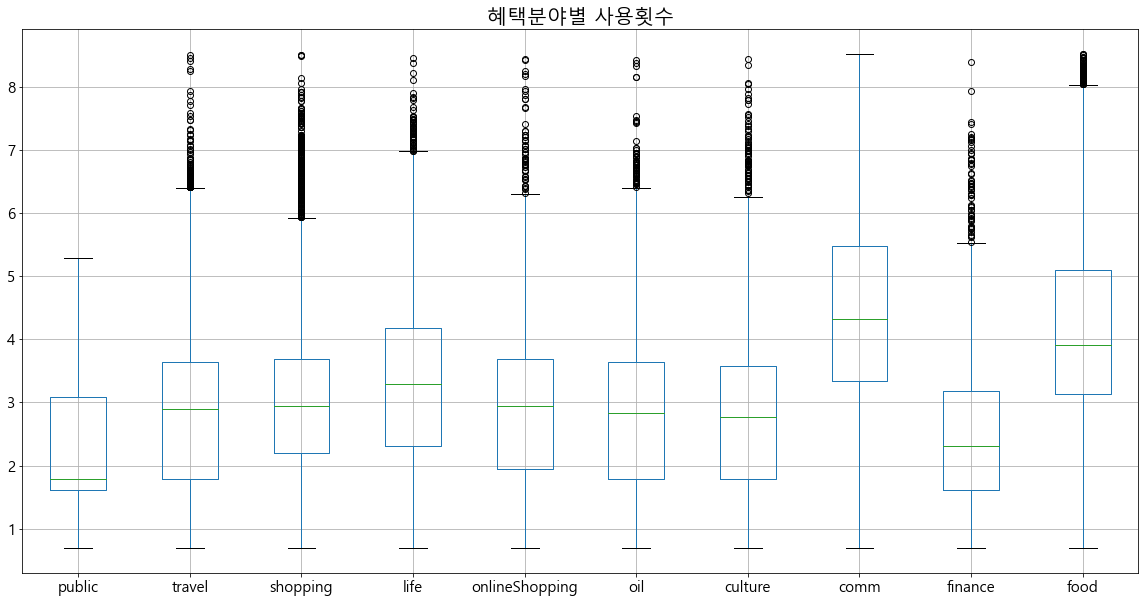

In [194]:
np.log1p(benefit).boxplot(figsize=(20, 10), fontsize=15)
plt.title("혜택분야별 사용횟수", fontsize=20)

In [195]:
# ANOVA 분석
f_result = stats.f_oneway(field['public'], field['travel'], field['shopping'], field['life'], \
                        field['onlineShopping'], field['oil'], field['culture'], field['comm'], field['finance'], field['food'])

f,p = f_result.statistic.round(3), f_result.pvalue.round(3)
print("[One-way]")
print("F 통계랑:{}".format(f))
print("p-value:{}".format(p))

[One-way]
F 통계랑:2077.277
p-value:0.0


In [179]:
field ={}

for i in df_merge['혜택분야'].unique():
    field[i] = list(itertools.chain.from_iterable(df_2[df_2['혜택분야'] == i][['사용횟수']].values))

In [180]:
benefit = pd.DataFrame(dict([ (i, pd.Series(j)) for i,j in field.items() ]))

Text(0.5, 1.0, '혜택분야별 사용횟수')

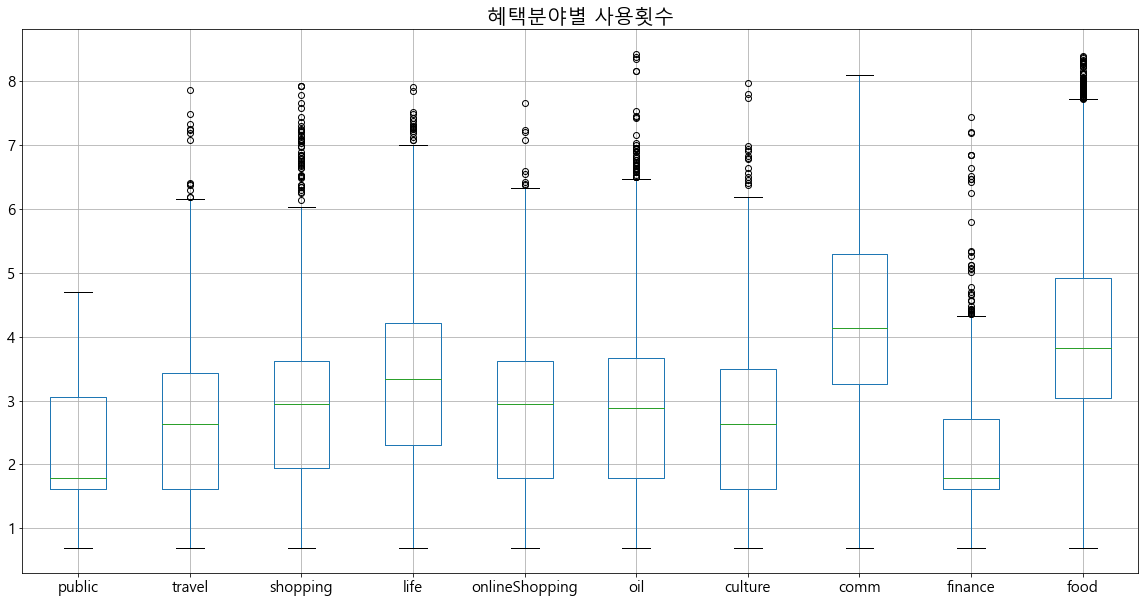

In [181]:
np.log1p(benefit).boxplot(figsize=(20, 10), fontsize=15)
plt.title("혜택분야별 사용횟수", fontsize=20)

In [182]:
# ANOVA 분석
f_result = stats.f_oneway(field['public'], field['travel'], field['shopping'], field['life'], \
                        field['onlineShopping'], field['oil'], field['culture'], field['comm'], field['finance'], field['food'])

f,p = f_result.statistic.round(3), f_result.pvalue.round(3)
print("[One-way]")
print("F 통계랑:{}".format(f))
print("p-value:{}".format(p))

[One-way]
F 통계랑:1357.641
p-value:0.0


> 각 혜택별로 사용횟수에 대해 연관성이 있다.

### 혜택에 대한 사용금액 차이 검정

In [196]:
field ={}

for i in df_merge['혜택분야'].unique():
    field[i] = list(itertools.chain.from_iterable(df_merge[df_merge['혜택분야'] == i][['사용금액']].values))

In [197]:
benefit = pd.DataFrame(dict([ (i, pd.Series(j)) for i,j in field.items() ]))

Text(0.5, 1.0, '혜택분야별 사용금액')

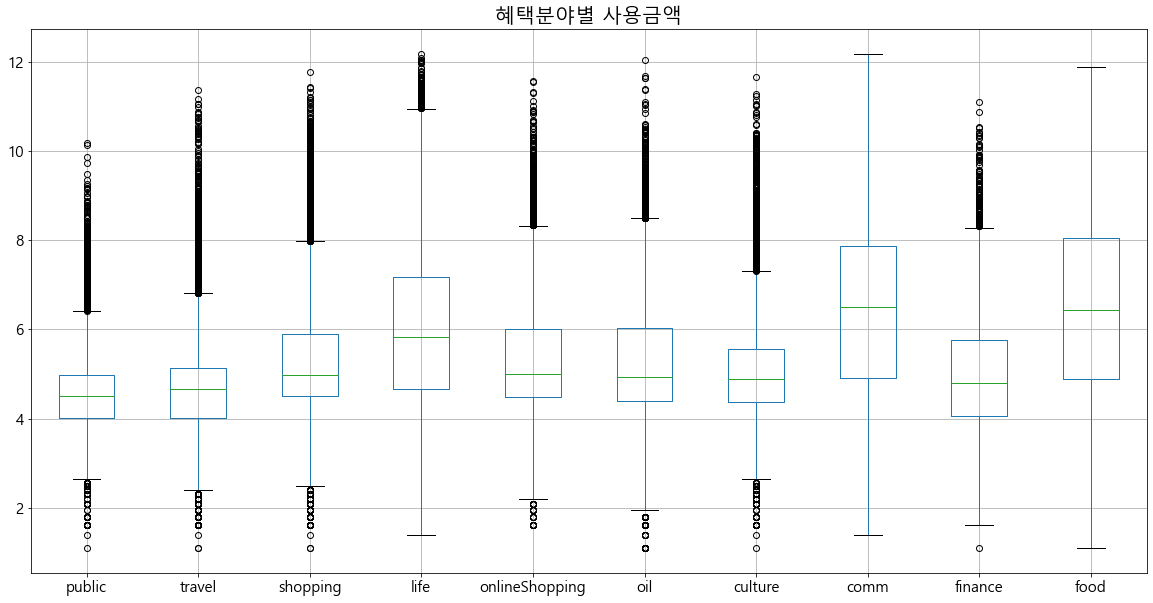

In [198]:
np.log1p(benefit).boxplot(figsize=(20, 10), fontsize=15)
plt.title("혜택분야별 사용금액", fontsize=20)

In [199]:
# ANOVA 분석
f_result = stats.f_oneway(field['public'], field['travel'], field['shopping'], field['life'], \
                        field['onlineShopping'], field['oil'], field['culture'], field['comm'], field['finance'], field['food'])

f,p = f_result.statistic.round(3), f_result.pvalue.round(3)
print("[One-way]")
print("F 통계랑:{}".format(f))
print("p-value:{}".format(p))

[One-way]
F 통계랑:849.508
p-value:0.0


In [188]:
field ={}

for i in df_2['혜택분야'].unique():
    field[i] = list(itertools.chain.from_iterable(df_2[df_2['혜택분야'] == i][['사용금액']].values))

In [189]:
benefit = pd.DataFrame(dict([ (i, pd.Series(j)) for i,j in field.items() ]))

Text(0.5, 1.0, '혜택분야별 사용금액')

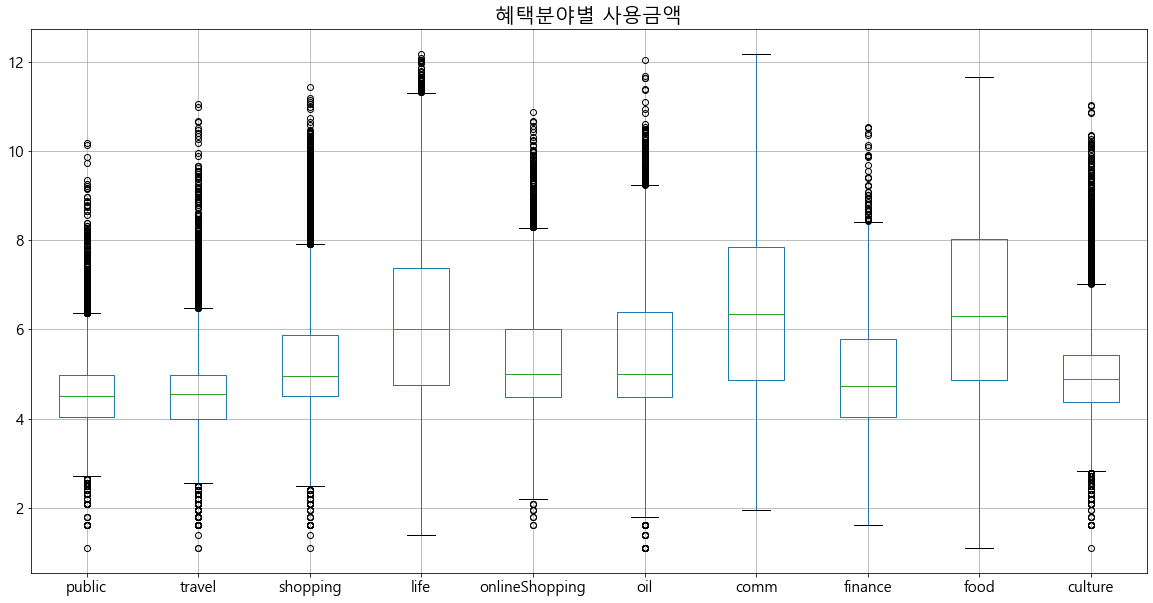

In [190]:
np.log1p(benefit).boxplot(figsize=(20, 10), fontsize=15)
plt.title("혜택분야별 사용금액", fontsize=20)

In [191]:
# ANOVA 분석
f_result = stats.f_oneway(field['public'], field['travel'], field['shopping'], field['life'], \
                        field['onlineShopping'], field['oil'], field['culture'], field['comm'], field['finance'], field['food'])

f,p = f_result.statistic.round(3), f_result.pvalue.round(3)
print("[One-way]")
print("F 통계랑:{}".format(f))
print("p-value:{}".format(p))

[One-way]
F 통계랑:532.087
p-value:0.0


> 각 혜택별로 사용금액에 대해 연관성이 있다.

In [109]:
a = df_merge[["혜택분야","사용횟수", "사용금액"]]
a.pivot_table(index = "혜택분야", values=["사용횟수", "사용금액"])

# pivot_table(index= "혜택분야", values="사용횟수")
#     condition = df_merge.혜택분야 == a
#     b = df_merge.loc[condition, ["혜택분야", "사용횟수", "사용금액"]]
# b

,사용금액,사용횟수
혜택분야,,
comm,3670.160894,214.542825
culture,537.077590,31.544642
finance,727.074507,32.797414
food,3332.545049,180.458162
life,2720.400215,64.447410
oil,764.160049,33.914567
onlineShopping,667.357253,34.365423
public,191.803553,14.997849
shopping,658.507272,34.905732


## 다중회귀분석

In [19]:
df_merge.corr().round(3)

,연령,사용횟수,사용금액,사용카드,가족카드여부
연령,1.000,-0.114,-0.040,0.113,0.034
사용횟수,-0.114,1.000,0.765,0.061,0.010
사용금액,-0.040,0.765,1.000,0.009,0.017
사용카드,0.113,0.061,0.009,1.000,0.182
가족카드여부,0.034,0.010,0.017,0.182,1.000


In [200]:
reg_model = smf.ols(formula = "사용금액 ~ C(지역)+사용횟수+C(연령대)+C(혜택분야)+C(요일)+C(소비처업종)+C(분류)+사용카드+가족카드여부",data = df_merge)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   사용금액   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     6155.
Date:                Wed, 08 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:12:01   Log-Likelihood:            -1.7071e+06
No. Observations:              175358   AIC:                         3.414e+06
Df Residuals:                  175313   BIC:                         3.415e+06
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

> 연령대, 목, 토, 화 , 가전, 사무통신, 신변잡화, 연료판매, 자동차 판매, 전기, 직물, 가족카드 여부

In [28]:
df_merge.head()

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,연령대,요일,분류,혜택분야,소개,연회비,옵션,카드명,가족카드여부
0,2018-04-01,노원구,상계2동,노원구 상계2동,자동차정비,여성,42,3,56,82,40대,일,체크카드,public,내게 꼭 필요한 생활서비스 이용 시 학자금 대출 상환 포인트 적립 학자금 대출 부담...,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",내미래 S카드 S20 체크,0.0
1,2018-04-01,종로구,혜화동,종로구 혜화동,유통업,여성,43,2,50,61,40대,일,체크카드,travel,신한카드 스포츠누리로 보다 특별한 스포츠 할인 혜택을 누리세요!,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",S카드 스포츠누리 체크,0.0
2,2018-04-01,노원구,"상계6,7동","노원구 상계6,7동",레저업소,남성,50,2,59,140,50대,일,신용카드,shopping,세상을 복음의 빛으로 바꾸는 GOOD 카드,있음,"후불교통가능, IC기능 탑재, 가족카드 가능",GOOD S카드 Style-S,1.0
3,2018-04-01,종로구,"종로5,6가동","종로구 종로5,6가동",레저업소,남성,45,3,56,104,40대,일,신용카드,life,"앞서가는 여성의 필수품, Lady카드!",있음,"후불교통가능, IC기능 탑재, 가족카드 가능",S카드 Lady,1.0
4,2018-04-01,노원구,중계4동,노원구 중계4동,음료식품,여성,38,2,57,103,30대,일,신용카드,life,프리드라이프 상조회비 자동이체시 할인까지!,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",프리드라이프 GS칼텍스 S카드 S,0.0


In [38]:
df_merge['가족카드여부'].unique()

array([0., 1.])

In [30]:
# 사용일자, 주소, 연령, 소개, 카드명 제외
# 종속변수 : 사용금액 제외
# 지역 : 노원구, 종로구 (2개)
# 소비처 (27개)
# 소비처업종 (21개)
# 성별 : 여성/남성 (2개)
# 사용횟수
# 사용카드 ############# 범주형인 것 같은데 연속형으로 해야하나?
# 연령대 :
# 요일 :
# 분류 : 체크/신한카드 (2개)
# 혜택분야 10개인데.. 이거 더미변수화 가능? .............
# 연회비 : 있음/없음/면제 (3개)
# 옵션 : 후불교통 가능 유무, IC기능 탑재 유무, **가족카드 발급 유무**(제외)에 대한 변수화 필요 -> 가족카드여부 변수명처럼 변환

In [39]:
df_raw = df_merge.drop(["사용일자", "주소", "연령", "사용금액", "소개", "카드명"], axis=1)
df_raw

,지역,소비처,소비처업종,성별,사용횟수,사용카드,연령대,요일,분류,혜택분야,연회비,옵션,가족카드여부
0,노원구,상계2동,자동차정비,여성,3,82,40대,일,체크카드,public,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",0.0
1,종로구,혜화동,유통업,여성,2,61,40대,일,체크카드,travel,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",0.0
2,노원구,"상계6,7동",레저업소,남성,2,140,50대,일,신용카드,shopping,있음,"후불교통가능, IC기능 탑재, 가족카드 가능",1.0
3,종로구,"종로5,6가동",레저업소,남성,3,104,40대,일,신용카드,life,있음,"후불교통가능, IC기능 탑재, 가족카드 가능",1.0
4,노원구,중계4동,음료식품,여성,2,103,30대,일,신용카드,life,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187317,노원구,상계10동,서적문구,여성,5,212,30대,목,신용카드,travel,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",0.0
187318,노원구,상계10동,의료기관,남성,5,4,60대,목,체크카드,life,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",0.0
187319,노원구,상계10동,요식업소,여성,9,163,60대,목,신용카드,food,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",0.0
187320,노원구,상계10동,요식업소,남성,18,164,50대,목,신용카드,food,있음,"후불교통가능, IC기능 탑재, 가족카드 가능",1.0


In [25]:
df_merge1 = df_merge[df_merge.colu]
df_merge_x = df_merge.drop("사용금액",axis = 1)
df_merge_x_const = add_constant(df_merge_x)
df_merge_x_const
# df_merge_vif = pd.DataFrame()
# df_merge_vif["variable"] = df_merge_x_const.columns
# df_merge_vif['VIF'] = [variance_inflation_factor(df_merge_x_const.values, i) for i in range(df_merge_x_const.shape[1])]
# df_merge_vif.sort_values("VIF",inplace = True)
# df_merge_vif.round(3)


,const,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용카드,연령대,요일,분류,혜택분야,소개,연회비,옵션,카드명,가족카드여부
0,1.0,2018-04-01,노원구,상계2동,노원구 상계2동,자동차정비,여성,42,3,82,40대,일,체크카드,public,내게 꼭 필요한 생활서비스 이용 시 학자금 대출 상환 포인트 적립 학자금 대출 부담...,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",내미래 S카드 S20 체크,0.0
1,1.0,2018-04-01,종로구,혜화동,종로구 혜화동,유통업,여성,43,2,61,40대,일,체크카드,travel,신한카드 스포츠누리로 보다 특별한 스포츠 할인 혜택을 누리세요!,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",S카드 스포츠누리 체크,0.0
2,1.0,2018-04-01,노원구,"상계6,7동","노원구 상계6,7동",레저업소,남성,50,2,140,50대,일,신용카드,shopping,세상을 복음의 빛으로 바꾸는 GOOD 카드,있음,"후불교통가능, IC기능 탑재, 가족카드 가능",GOOD S카드 Style-S,1.0
3,1.0,2018-04-01,종로구,"종로5,6가동","종로구 종로5,6가동",레저업소,남성,45,3,104,40대,일,신용카드,life,"앞서가는 여성의 필수품, Lady카드!",있음,"후불교통가능, IC기능 탑재, 가족카드 가능",S카드 Lady,1.0
4,1.0,2018-04-01,노원구,중계4동,노원구 중계4동,음료식품,여성,38,2,103,30대,일,신용카드,life,프리드라이프 상조회비 자동이체시 할인까지!,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",프리드라이프 GS칼텍스 S카드 S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187317,1.0,2019-02-28,노원구,상계10동,노원구 상계10동,서적문구,여성,30,5,212,30대,목,신용카드,travel,레일리지 쌓고 SRT 이용시 혜택 받으세요!,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",SRT GS칼텍스 S카드 S,0.0
187318,1.0,2019-02-28,노원구,상계10동,노원구 상계10동,의료기관,남성,60,5,4,60대,목,체크카드,life,미니언즈가 다 드림!,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",S카드 Deep Dream 체크\n(미니언즈),0.0
187319,1.0,2019-02-28,노원구,상계10동,노원구 상계10동,요식업소,여성,60,9,163,60대,목,신용카드,food,해피포인트 가맹점 이용 시 10% 청구할인,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",해피포인트 GS칼텍스 S카드 BigPlus,0.0
187320,1.0,2019-02-28,노원구,상계10동,노원구 상계10동,요식업소,남성,55,18,164,50대,목,신용카드,food,"대한민국 씨푸드의 선두주자 Steam Pot, 특별한 곳, 특별한 맛, 해물 샤브샤...",있음,"후불교통가능, IC기능 탑재, 가족카드 가능",스팀-폿 S카드,1.0


In [243]:
# import Timestamp
df_merge_y = df_merge["사용금액"]
model = LinearRegression()
rfe = RFE(estimator= model , n_features_to_select=5).fit(df_merge_x,df_merge_y)
selected_cols = df_merge_x.columns[rfe.supports_]

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [220]:
df_merge.describe()

,연령,사용횟수,사용금액,사용카드,가족카드여부
count,187321.000000,187321.000000,187321.000000,187321.000000,187321.000000
mean,45.279467,78.285718,1580.557631,140.596041,0.406142
std,16.040972,224.314723,6324.053011,72.345161,0.491113
min,20.000000,1.000000,2.000000,0.000000,0.000000
25%,32.000000,9.000000,90.000000,94.000000,0.000000
50%,45.000000,24.000000,153.000000,158.000000,0.000000
75%,56.000000,53.000000,680.000000,206.000000,1.000000
max,105.000000,4995.000000,193694.000000,262.000000,1.000000


In [221]:
t_result = stats.ttest_1samp(df_merge,6324)
t,p = t_result.statistic.round(3)
t_result.pvalue.round(3)

NameError: name 'stats' is not defined

In [241]:
# drop: X변수외 변수 삭제
df_raw_x = df_merge.drop(['지역', '소비처', '주소', '성별', '요일', '분류', '혜택분야', '소개','사용일자','옵션','카드명','연회비', '연령'], axis = 1, inplace = False)

# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_raw_x)

# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()

,사용횟수,사용금액,사용카드,가족카드여부,소비처업종_가구,소비처업종_가전,소비처업종_광학제품,소비처업종_레저업소,소비처업종_문화취미,소비처업종_보건위생,...,소비처업종_자동차정비,소비처업종_자동차판매,소비처업종_전기,소비처업종_주방용품,소비처업종_직물,연령대_20대,연령대_30대,연령대_40대,연령대_50대,연령대_60대
0,3,56,82,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,2,50,61,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,59,140,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,56,104,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,57,103,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [242]:
df_raw_dummy.columns

Index(['사용횟수', '사용금액', '사용카드', '가족카드여부', '소비처업종_가구', '소비처업종_가전', '소비처업종_광학제품',
       '소비처업종_레저업소', '소비처업종_문화취미', '소비처업종_보건위생', '소비처업종_사무통신', '소비처업종_서적문구',
       '소비처업종_수리서비스', '소비처업종_신변잡화', '소비처업종_연료판매', '소비처업종_요식업소', '소비처업종_유통업',
       '소비처업종_음료식품', '소비처업종_의료기관', '소비처업종_의복', '소비처업종_자동차정비', '소비처업종_자동차판매',
       '소비처업종_전기', '소비처업종_주방용품', '소비처업종_직물', '연령대_20대', '연령대_30대', '연령대_40대',
       '연령대_50대', '연령대_60대'],
      dtype='object')

## 혜택별 시계열분석(잠재적으로 사용량이 증가하는 혜택에 대한 카드 개발 필요성 언급을 위함)

In [256]:
df_merge.head()

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,연령대,요일,분류,혜택분야,소개,연회비,옵션,카드명,가족카드여부
0,2018-04-01,노원구,상계2동,노원구 상계2동,자동차정비,여성,42,3,56,82,40대,일,체크카드,public,내게 꼭 필요한 생활서비스 이용 시 학자금 대출 상환 포인트 적립 학자금 대출 부담...,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",내미래 S카드 S20 체크,0.0
1,2018-04-01,종로구,혜화동,종로구 혜화동,유통업,여성,43,2,50,61,40대,일,체크카드,travel,신한카드 스포츠누리로 보다 특별한 스포츠 할인 혜택을 누리세요!,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",S카드 스포츠누리 체크,0.0
2,2018-04-01,노원구,"상계6,7동","노원구 상계6,7동",레저업소,남성,50,2,59,140,50대,일,신용카드,shopping,세상을 복음의 빛으로 바꾸는 GOOD 카드,있음,"후불교통가능, IC기능 탑재, 가족카드 가능",GOOD S카드 Style-S,1.0
3,2018-04-01,종로구,"종로5,6가동","종로구 종로5,6가동",레저업소,남성,45,3,56,104,40대,일,신용카드,life,"앞서가는 여성의 필수품, Lady카드!",있음,"후불교통가능, IC기능 탑재, 가족카드 가능",S카드 Lady,1.0
4,2018-04-01,노원구,중계4동,노원구 중계4동,음료식품,여성,38,2,57,103,30대,일,신용카드,life,프리드라이프 상조회비 자동이체시 할인까지!,있음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",프리드라이프 GS칼텍스 S카드 S,0.0


In [263]:
df_raw = df_merge[['사용일자', '혜택분야', '사용횟수']]
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175358 entries, 0 to 187321
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   사용일자    175358 non-null  datetime64[ns]
 1   혜택분야    175358 non-null  object        
 2   사용횟수    175358 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 9.4+ MB


In [264]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [265]:
df_raw['혜택분야'].unique()

array(['public', 'travel', 'shopping', 'life', 'onlineShopping', 'oil',
       'culture', 'comm', 'finance', 'food'], dtype=object)

In [634]:
df_wn = df_merge[(df_merge['성별']=='여성') & (df_merge['지역']=='노원구')] ##       ##노원 - 여성만 함

In [635]:
df_wna = df_wn.pivot_table(index= '사용일자', columns = '혜택분야', values='사용횟수', aggfunc = 'sum')
df_wna

혜택분야,comm,culture,finance,food,life,oil,onlineShopping,public,shopping,travel
사용일자,,,,,,,,,,
2018-04-01,6025.0,178.0,44.0,1005.0,244.0,280.0,153.0,131.0,697.0,60.0
2018-04-02,3335.0,363.0,70.0,1447.0,1422.0,215.0,117.0,119.0,1162.0,166.0
2018-04-03,4446.0,204.0,4.0,2112.0,975.0,629.0,594.0,96.0,831.0,114.0
2018-04-04,5011.0,55.0,NaN,1721.0,1813.0,54.0,383.0,60.0,1346.0,239.0
2018-04-05,1588.0,303.0,46.0,2315.0,582.0,147.0,693.0,69.0,474.0,410.0
2018-04-06,2452.0,374.0,4.0,2988.0,1181.0,128.0,272.0,187.0,1117.0,117.0
2018-04-07,3831.0,247.0,25.0,5161.0,1504.0,258.0,595.0,53.0,1646.0,103.0
2018-04-08,1645.0,389.0,76.0,2407.0,459.0,228.0,88.0,164.0,519.0,202.0
2018-04-09,4814.0,852.0,42.0,3923.0,1823.0,168.0,487.0,153.0,588.0,274.0


In [323]:
df_a = df_merge.pivot_table(index= '사용일자', columns = '혜택분야', values='사용횟수', aggfunc = 'sum')
df_a

혜택분야,comm,culture,finance,food,life,oil,onlineShopping,public,shopping,travel
사용일자,,,,,,,,,,
2018-04-01,16309.0,1160.0,68.0,10044.0,5167.0,868.0,446.0,439.0,2489.0,485.0
2018-04-02,20165.0,1791.0,127.0,9455.0,4971.0,1207.0,2414.0,516.0,2240.0,1328.0
2018-04-03,16833.0,455.0,43.0,14302.0,4287.0,2444.0,1308.0,450.0,8547.0,406.0
2018-04-04,14894.0,1884.0,94.0,9511.0,3738.0,1005.0,860.0,542.0,2843.0,1547.0
2018-04-05,10446.0,1180.0,257.0,17819.0,2668.0,1314.0,2648.0,189.0,3525.0,1100.0
...,...,...,...,...,...,...,...,...,...,...
2019-02-24,11731.0,731.0,42.0,6281.0,1408.0,1707.0,931.0,113.0,2181.0,3005.0
2019-02-25,15908.0,921.0,310.0,12673.0,6924.0,2474.0,1493.0,594.0,4146.0,438.0
2019-02-26,14542.0,1298.0,378.0,9109.0,5201.0,1821.0,1431.0,367.0,2472.0,1173.0


In [271]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   사용일자            334 non-null    datetime64[ns]
 1   comm            334 non-null    float64       
 2   culture         334 non-null    float64       
 3   finance         331 non-null    float64       
 4   food            334 non-null    float64       
 5   life            334 non-null    float64       
 6   oil             334 non-null    float64       
 7   onlineShopping  334 non-null    float64       
 8   public          334 non-null    float64       
 9   shopping        334 non-null    float64       
 10  travel          334 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 28.8 KB


<AxesSubplot:>

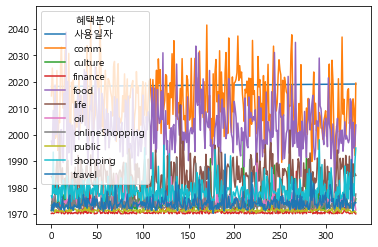

In [272]:
df_a.plot()

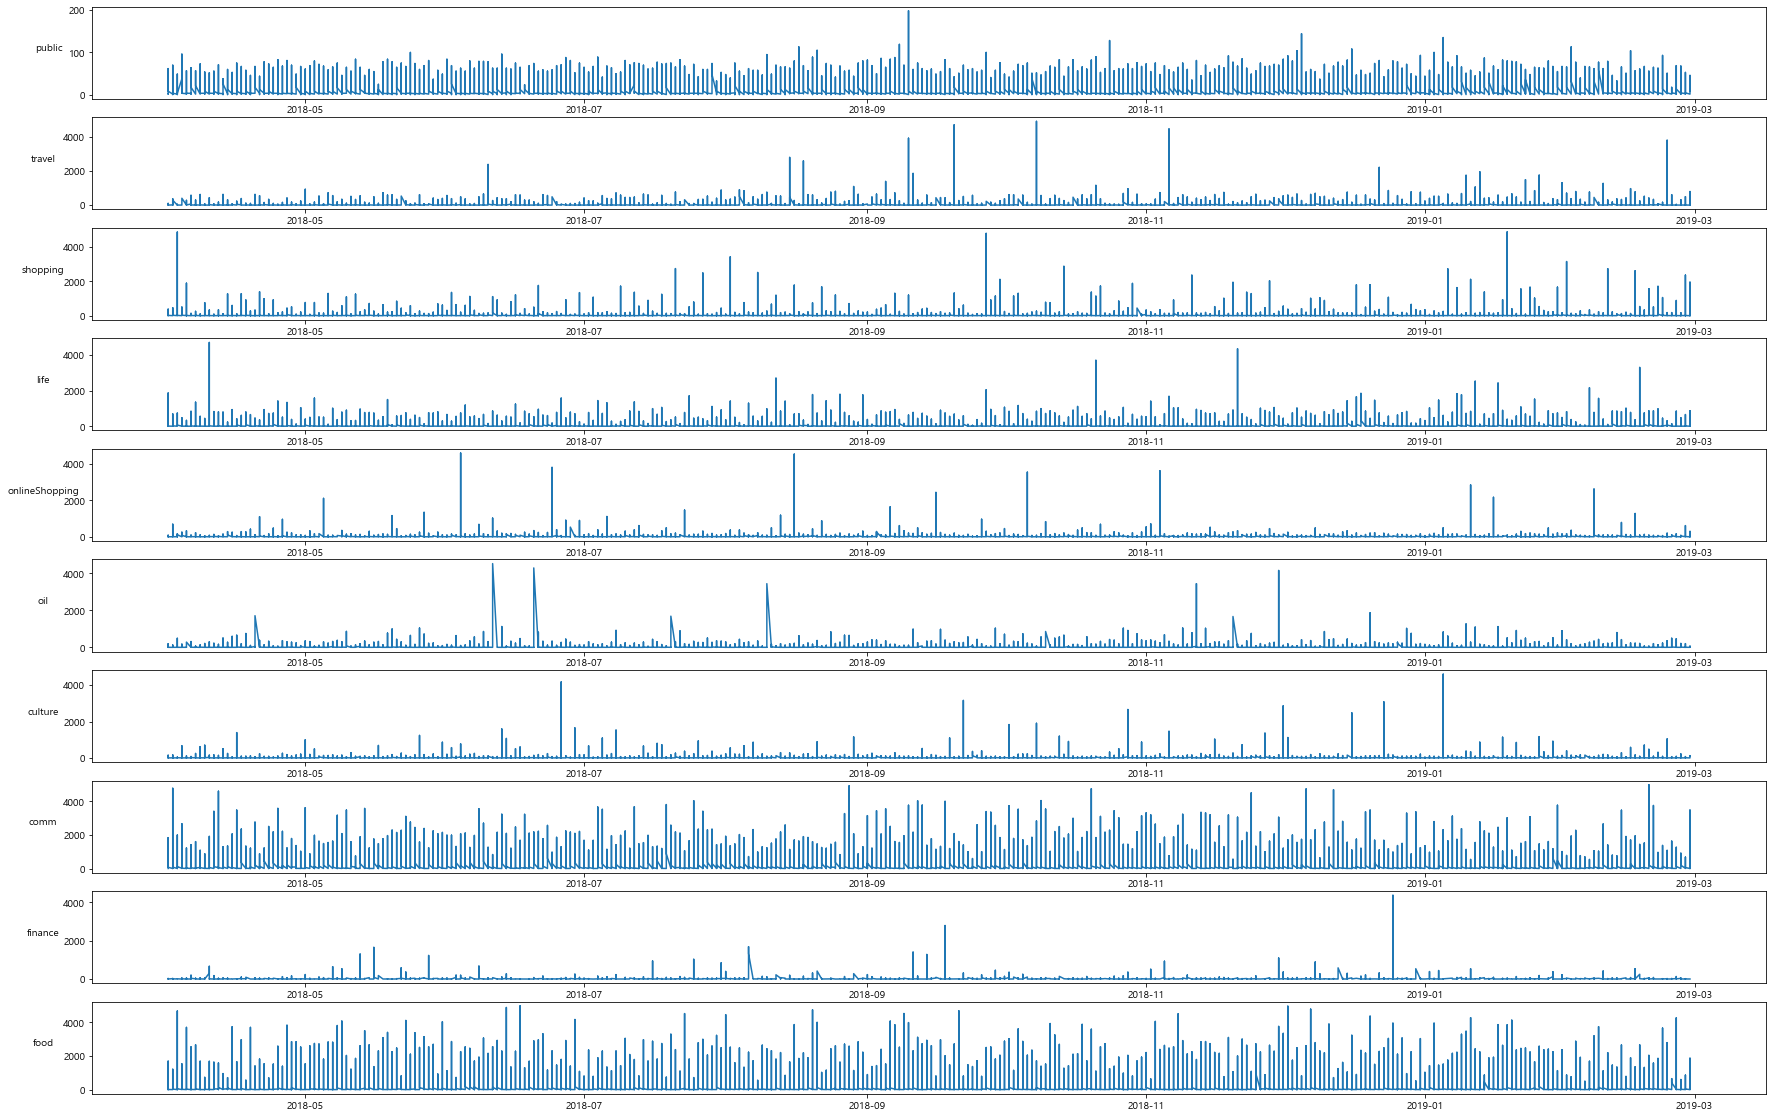

In [276]:
# fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(nrows=10, ncols=1, figsize=(30, 20))

# for (ax, idx, benefit) in zip([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10], [1,2,3,4,5,6,7,8,9,10], ['public', 'travel', 'shopping', 'life', 'onlineShopping', 'oil','culture', 'comm', 'finance', 'food']):
#     ax.plot("사용일자", "사용횟수", data = df_raw[df_raw["혜택분야"]==benefit])
#     ax.set_ylabel(benefit, rotation = 0, labelpad=20)

In [330]:
df_a

혜택분야,level_0,index,사용일자,comm,culture,finance,food,life,oil,onlineShopping,public,shopping,travel
0,0,0,2018-04-01,16309.0,1160.0,68.0,10044.0,5167.0,868.0,446.0,439.0,2489.0,485.0
1,1,1,2018-04-02,20165.0,1791.0,127.0,9455.0,4971.0,1207.0,2414.0,516.0,2240.0,1328.0
2,2,2,2018-04-03,16833.0,455.0,43.0,14302.0,4287.0,2444.0,1308.0,450.0,8547.0,406.0
3,3,3,2018-04-04,14894.0,1884.0,94.0,9511.0,3738.0,1005.0,860.0,542.0,2843.0,1547.0
4,4,4,2018-04-05,10446.0,1180.0,257.0,17819.0,2668.0,1314.0,2648.0,189.0,3525.0,1100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,329,329,2019-02-24,11731.0,731.0,42.0,6281.0,1408.0,1707.0,931.0,113.0,2181.0,3005.0
330,330,330,2019-02-25,15908.0,921.0,310.0,12673.0,6924.0,2474.0,1493.0,594.0,4146.0,438.0
331,331,331,2019-02-26,14542.0,1298.0,378.0,9109.0,5201.0,1821.0,1431.0,367.0,2472.0,1173.0
332,332,332,2019-02-27,8087.0,1218.0,117.0,9468.0,5598.0,1479.0,1747.0,369.0,7026.0,1601.0


In [631]:
#comm, culture, finance, food, life, oil, onlineShopping, public, shopping, travel

In [638]:
df_wna = df_wna.reset_index()

In [838]:
df_comm = df_wna[["사용일자", "travel"]] ##
df_comm = df_comm.groupby(["사용일자"])['travel'].agg('sum') ##
df_comm = pd.DataFrame(df_comm)
df_comm

,travel
사용일자,
2018-04-01,60.0
2018-04-02,166.0
2018-04-03,114.0
2018-04-04,239.0
2018-04-05,410.0
2018-04-06,117.0
2018-04-07,103.0
2018-04-08,202.0
2018-04-09,274.0


In [839]:
train_size = 0.9
len_idx = len(df_comm.index)
mask = (np.arange(len_idx)/len_idx) < train_size
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [840]:
df_comm_train = df_comm[mask]
df_comm_test = df_comm[~mask]
print("shape of train data: {}".format(df_comm_train.shape))
print("shape of test data: {}".format(df_comm_test.shape))

shape of train data: (301, 1)
shape of test data: (33, 1)


In [824]:
# #1차차분
# df_comm_diff1 = df_comm_train - df_comm_train.shift(1)
# df_comm_diff1.plot()

In [729]:
# #2차차분
# df_comm_diff2 = df_comm_train - 2* (df_comm_train.shift(1)) + (df_comm_train.shift(2))
# df_comm_diff2.plot()

In [730]:
# lag_size = 30
# fig = plt.figure(figsize = (12,8))
# ax1 = fig.add_subplot(211)
# fig = plot_acf(df_comm_train["comm"], lags=lag_size, ax=ax1)

# ax2 = fig.add_subplot(212)
# fig = plot_pacf(df_comm_train["comm"], lags=lag_size, ax=ax2)

In [841]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [842]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [843]:
for param in pdq: ## 냅두면 됨 오래걸림
     for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_comm,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No f

C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No f

C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No f

C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No f

In [845]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,
             'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [846]:
# print("pandas version: ", pd.__version__)
# pd.set_option('display.max_row', 500)
# pd.set_option('display.max_columns', 100)

In [847]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
27,"(0, 1, 1)","(0, 1, 1, 12)",4450.800951
31,"(0, 1, 1)","(1, 1, 1, 12)",4452.251387
59,"(1, 1, 1)","(0, 1, 1, 12)",4452.790681
63,"(1, 1, 1)","(1, 1, 1, 12)",4454.232949
11,"(0, 0, 1)","(0, 1, 1, 12)",4458.166536
15,"(0, 0, 1)","(1, 1, 1, 12)",4459.359764
47,"(1, 0, 1)","(1, 1, 1, 12)",4459.675091
43,"(1, 0, 1)","(0, 1, 1, 12)",4460.137290
3,"(0, 0, 0)","(0, 1, 1, 12)",4470.615433
7,"(0, 0, 0)","(1, 1, 1, 12)",4471.848866


In [856]:
mod = sm.tsa.statespace.SARIMAX(df_comm,
                                 order=(0, 0, 0), ##
                                 seasonal_order=(0, 1, 1, 12), ##
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -1.0000      0.009   -111.708      0.000      -1.018      -0.982
sigma2      1.004e+05   8.92e-08   1.13e+12      0.000       1e+05       1e+05


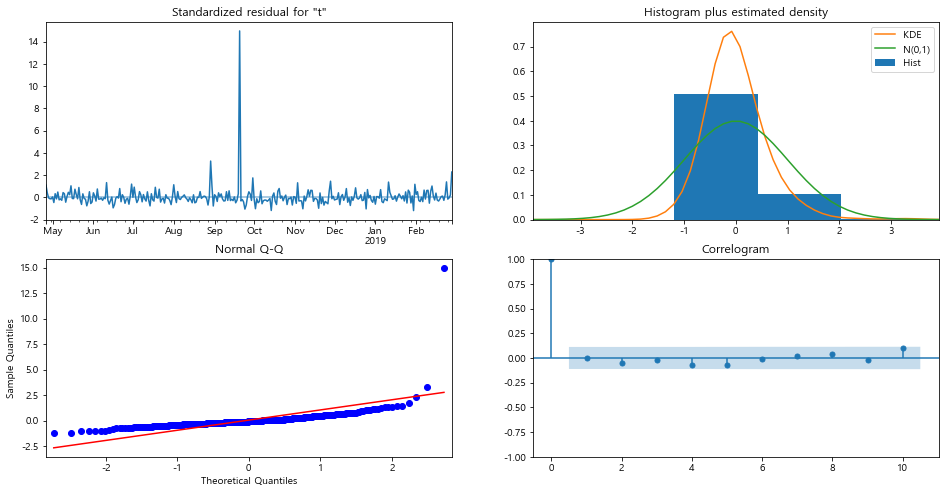

In [857]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [858]:
results.get_prediction()

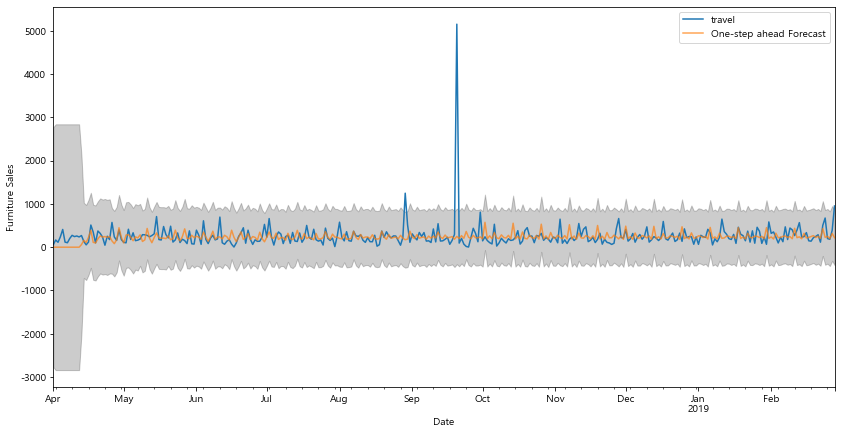

In [859]:
pred = results.get_prediction(start=pd.to_datetime('2018-04-01'), dynamic=False)
pred_ci = pred.conf_int() #추정된 계수의 신뢰구간 계산

ax = df_comm.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [860]:
y_forecasted = pred.predicted_mean
y_truth = df_comm['2018-04-01':'2019-02-28']['travel'] ##
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 102506.92


In [861]:
y_truth

사용일자
2018-04-01      60.0
2018-04-02     166.0
2018-04-03     114.0
2018-04-04     239.0
2018-04-05     410.0
2018-04-06     117.0
2018-04-07     103.0
2018-04-08     202.0
2018-04-09     274.0
2018-04-10     245.0
2018-04-11     259.0
2018-04-12     237.0
2018-04-13     269.0
2018-04-14     133.0
2018-04-15      54.0
2018-04-16     120.0
2018-04-17     512.0
2018-04-18     348.0
2018-04-19     100.0
2018-04-20     374.0
2018-04-21     318.0
2018-04-22     231.0
2018-04-23      46.0
2018-04-24     253.0
2018-04-25     176.0
2018-04-26     572.0
2018-04-27     237.0
2018-04-28     158.0
2018-04-29     400.0
2018-04-30     175.0
2018-05-01     113.0
2018-05-02     101.0
2018-05-03     415.0
2018-05-04     178.0
2018-05-05     333.0
2018-05-06     151.0
2018-05-07     163.0
2018-05-08     189.0
2018-05-09     290.0
2018-05-10     286.0
2018-05-11     274.0
2018-05-12     239.0
2018-05-13     269.0
2018-05-14     309.0
2018-05-15     708.0
2018-05-16     177.0
2018-05-17     167.0
2018-05-

In [862]:
y_forecasted

2018-04-01      0.000000
2018-04-02      0.000000
2018-04-03      0.000000
2018-04-04      0.000000
2018-04-05      0.000000
2018-04-06      0.000000
2018-04-07      0.000000
2018-04-08      0.000000
2018-04-09      0.000000
2018-04-10      0.000000
2018-04-11      0.000000
2018-04-12      0.000000
2018-04-13     60.000000
2018-04-14    158.067116
2018-04-15    108.552116
2018-04-16    227.578559
2018-04-17    390.406733
2018-04-18    111.408751
2018-04-19     98.077789
2018-04-20    192.346732
2018-04-21    260.905963
2018-04-22    233.291828
2018-04-23    246.622790
2018-04-24    225.674136
2018-04-25    249.935478
2018-04-26    145.840369
2018-04-27     81.943752
2018-04-28    175.105995
2018-04-29    449.715118
2018-04-30    226.808600
2018-05-01     99.015368
2018-05-02    280.950008
2018-05-03    288.754175
2018-05-04    232.173965
2018-05-05    148.766931
2018-05-06    239.002611
2018-05-07    214.734371
2018-05-08    285.556281
2018-05-09    132.778753
2018-05-10    169.497815


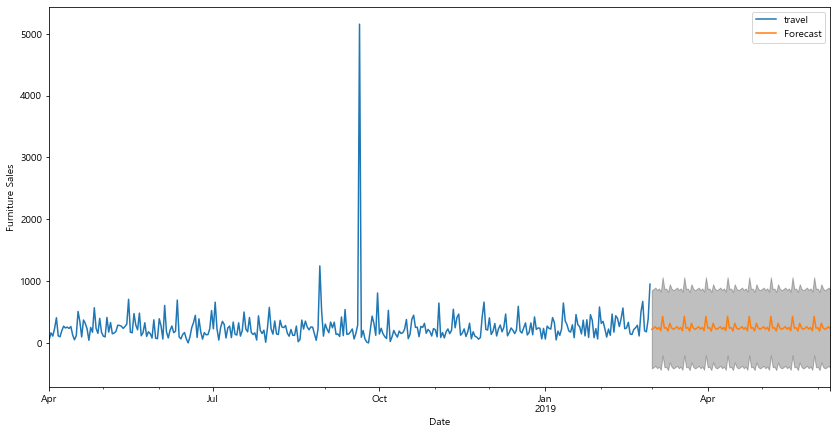

In [863]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = df_comm.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()